In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
  
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
path=r"C:\Users\A\Desktop\data trained\DATA SCIENCE CURRICULUM\Data TRained projects ML\Evaluation phase\incomimg\WA_Fn-UseC_-HR-Employee-Attrition.csv"
df=pd.read_csv(path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.isna().sum().sum()

0

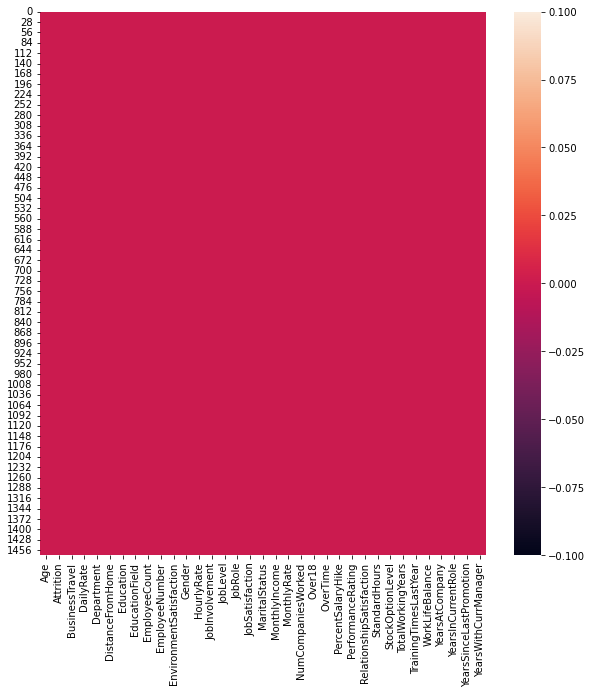

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()

In [8]:
alpha_features=df.columns[df.dtypes==np.object]

In [9]:
numeric_features=df.columns[df.dtypes!=np.object]

In [10]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


* Age

In [11]:
df['Age'].describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

1] There are not missing values in Age

2] minium values is 9 and maximum value is 60 and median is 36 which shows distribution is normal 

3] mean is also 36 means mean=median so distribution is normal.

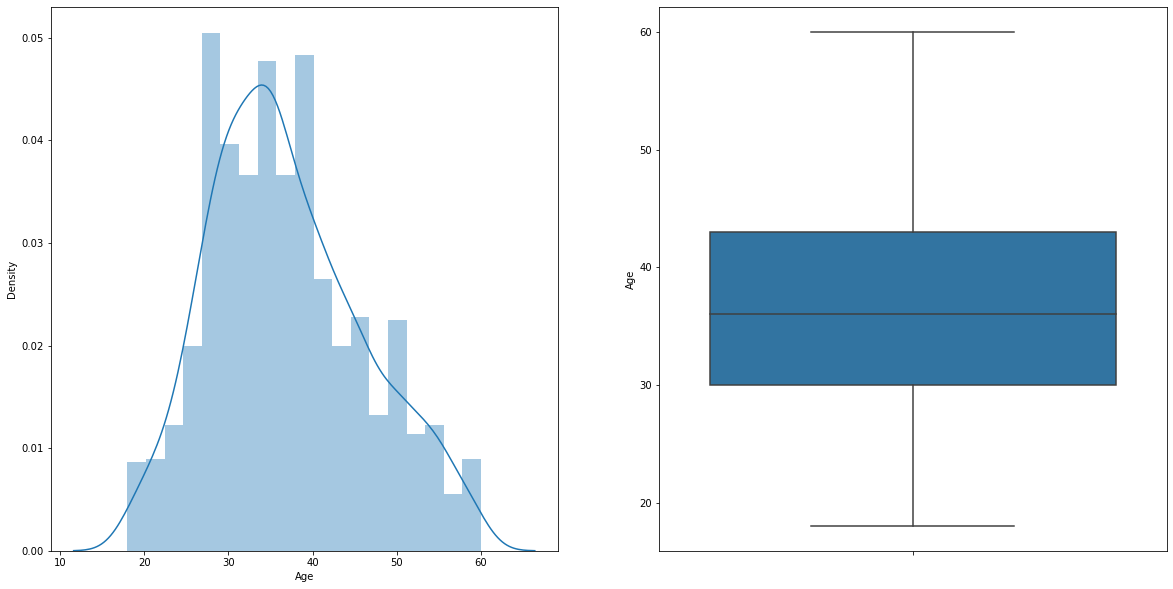

In [12]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df["Age"],ax=fig.add_subplot(1,2,1))
sns.boxplot(y=df['Age'],ax=fig.add_subplot(1,2,2))
plt.show()

* The distribution of age is normal and there is no outliers in Age feature.

* DailyRate

In [13]:
df['DailyRate'].describe()

count    1470.000000
mean      802.485714
std       403.509100
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

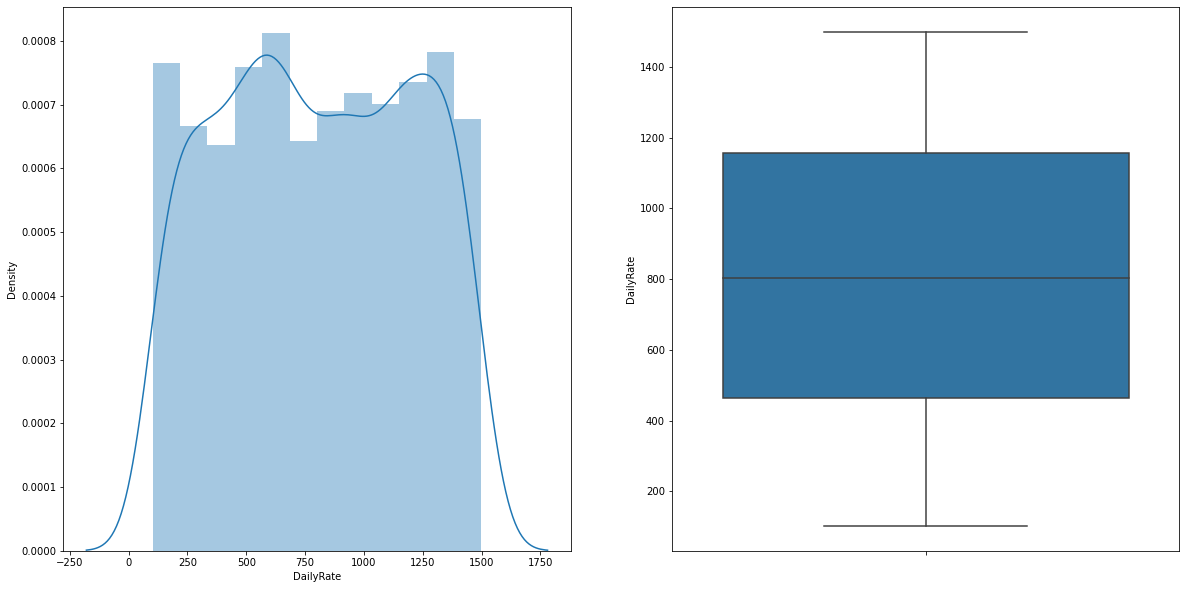

In [14]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['DailyRate'],ax=fig.add_subplot(1,2,1))
sns.boxplot(y=df['DailyRate'],ax=fig.add_subplot(1,2,2))
plt.show()

1] mean is equal to median and outliers are not observe in boxplot.

In [15]:
df['DistanceFromHome'].describe()

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

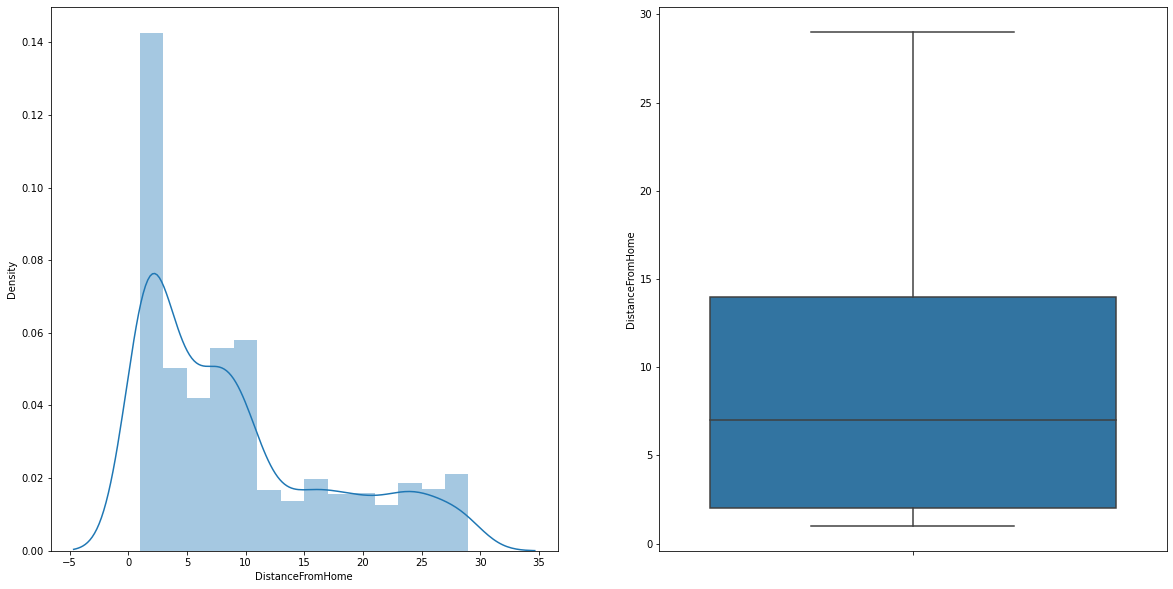

In [16]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['DistanceFromHome'],ax=fig.add_subplot(1,2,1))
sns.boxplot(y=df['DistanceFromHome'],ax=fig.add_subplot(1,2,2))
plt.show()

1] from mean standardDeviation and median it can be observe that there are no outliers in data.
  distance from home  is continuous variable. distribution is right skewed.  

* Education

In [17]:
df['Education'].describe()

count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64

In [18]:
df['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

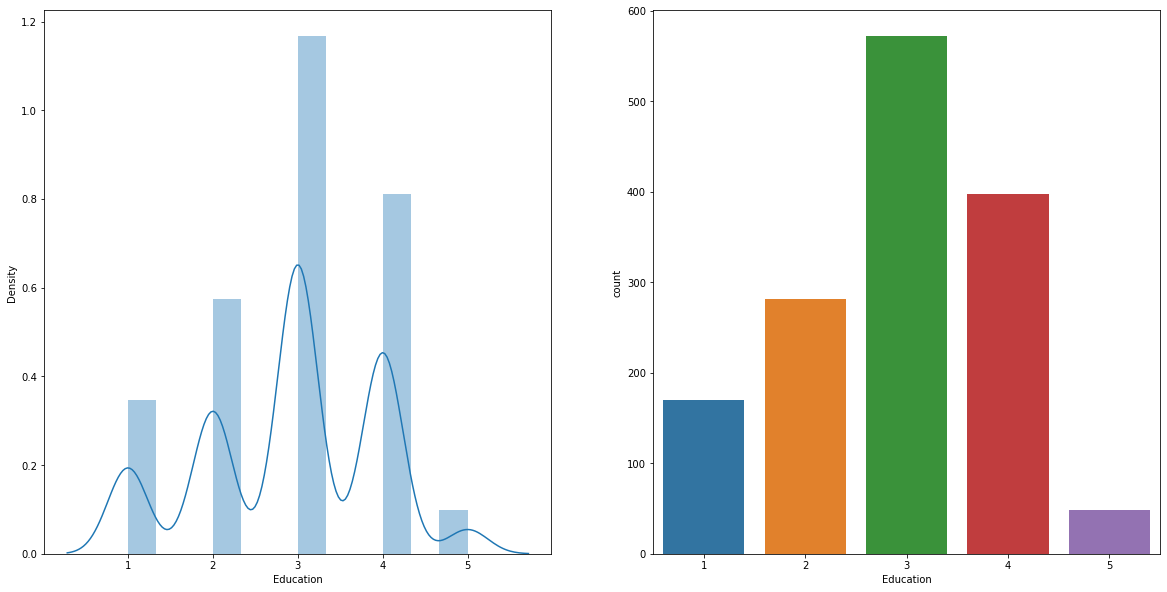

In [19]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['Education'],ax=fig.add_subplot(1,2,1))
sns.countplot(x=df['Education'],ax=fig.add_subplot(1,2,2))
plt.show()

1]  Education is categorical feature which have 05 categories from 1 to 5.

2] 3 have highest contribution while 5 has lowest contribution.

In [20]:
df['EmployeeCount'].describe()

count    1470.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: EmployeeCount, dtype: float64

In [21]:
df['EmployeeCount'].unique()

array([1], dtype=int64)

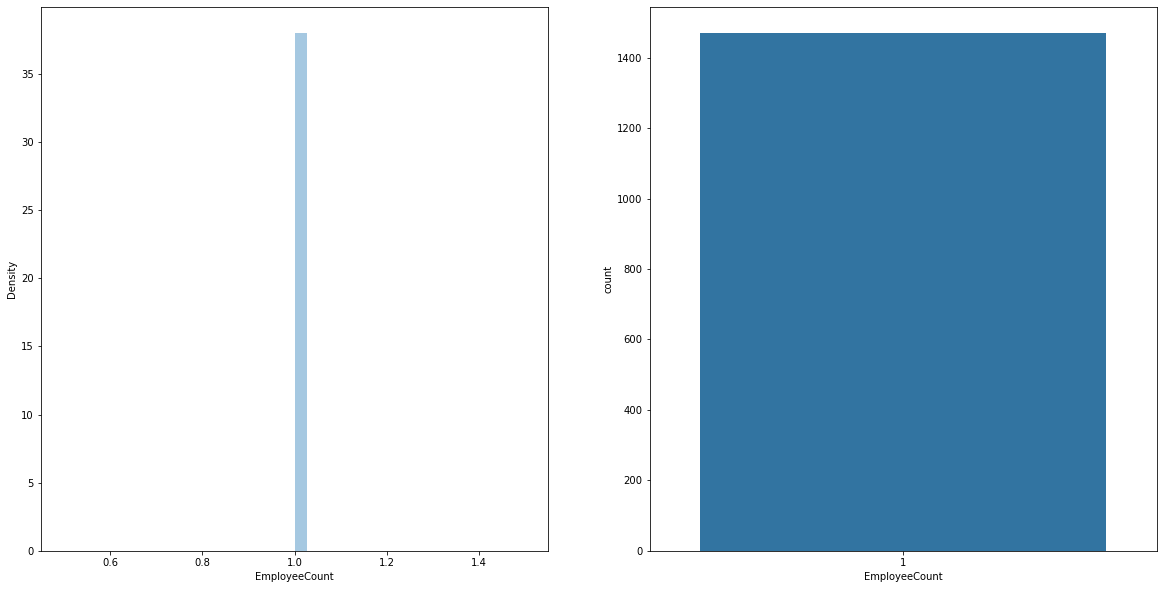

In [22]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['EmployeeCount'],ax=fig.add_subplot(1,2,1))
sns.countplot(x=df['EmployeeCount'],ax=fig.add_subplot(1,2,2))
plt.show()

1] EmployeeCount has only one category hence it can be eliminated.

* EmployeeNumber

In [23]:
df['EmployeeNumber'].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

In [24]:
len(df['EmployeeNumber'].unique())

1470

In [25]:
df['EmployeeNumber'].describe()

count    1470.000000
mean     1024.865306
std       602.024335
min         1.000000
25%       491.250000
50%      1020.500000
75%      1555.750000
max      2068.000000
Name: EmployeeNumber, dtype: float64

* This feature has 1470 categories equal to number of datapoints in dataset.
it is like EmployeeId or index value which can be remove or eliminate from dataset.

* EnvironmentSatisfaction

In [26]:
df['EnvironmentSatisfaction'].describe()

count    1470.000000
mean        2.721769
std         1.093082
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

In [27]:
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1], dtype=int64)

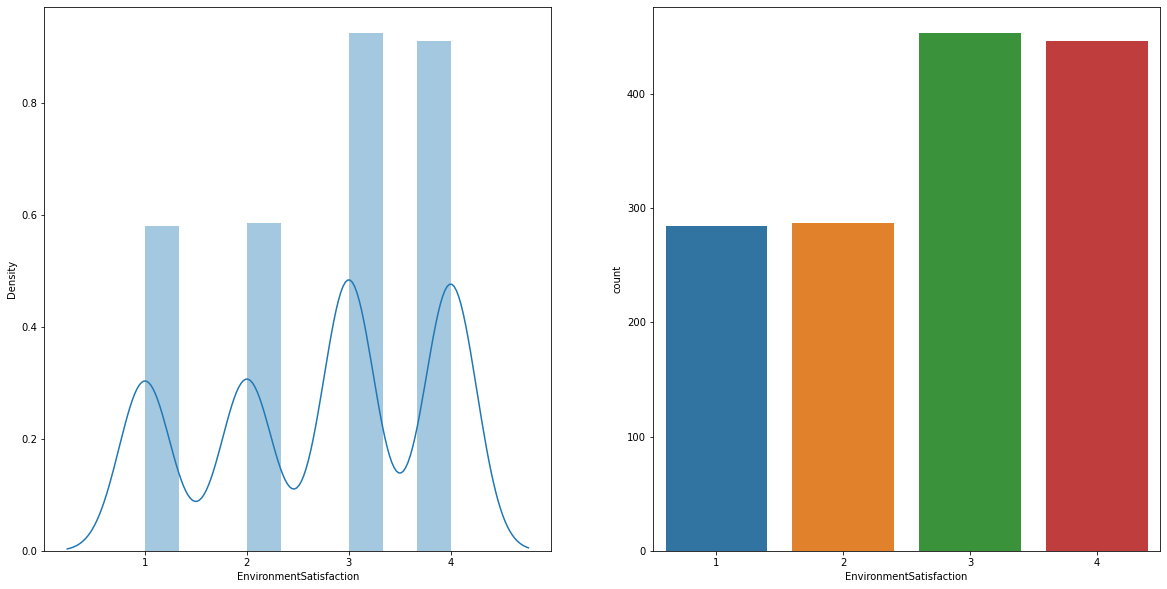

In [28]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['EnvironmentSatisfaction'],ax=fig.add_subplot(1,2,1))
sns.countplot(x=df['EnvironmentSatisfaction'],ax=fig.add_subplot(1,2,2))
plt.show()

1] Environment Satisfaction is caegorical varaible having 04 categories from 1 to 4

2] 3 and 4 category have highest contribution in data set which can be observe from countplot

* HourlyRate

In [29]:
df['HourlyRate'].describe()

count    1470.000000
mean       65.891156
std        20.329428
min        30.000000
25%        48.000000
50%        66.000000
75%        83.750000
max       100.000000
Name: HourlyRate, dtype: float64

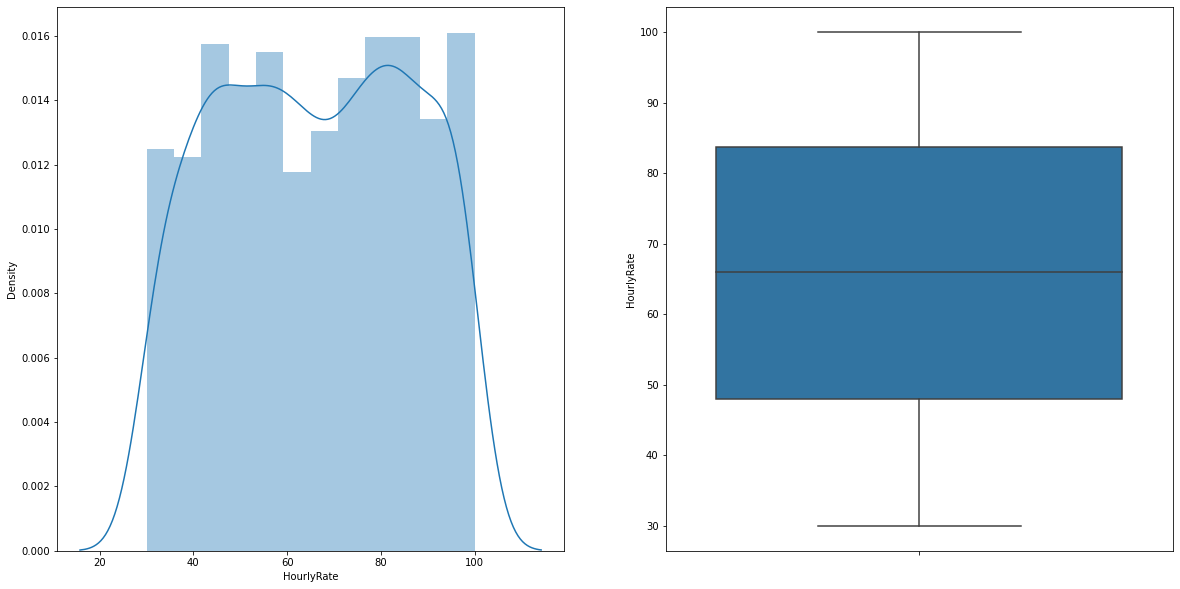

In [30]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['HourlyRate'],ax=fig.add_subplot(1,2,1))
sns.boxplot(y=df['HourlyRate'],ax=fig.add_subplot(1,2,2))
plt.show()

1] HourlyRate  isnot skew 

2] Outliers are not detected in boxplot.

3] which also conclude with desscriptive stats like mean an dmedian and statndard deviation

* JobInvolvement

In [31]:
df['JobInvolvement'].describe()

count    1470.000000
mean        2.729932
std         0.711561
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64

In [32]:
df['JobInvolvement'].unique()

array([3, 2, 4, 1], dtype=int64)

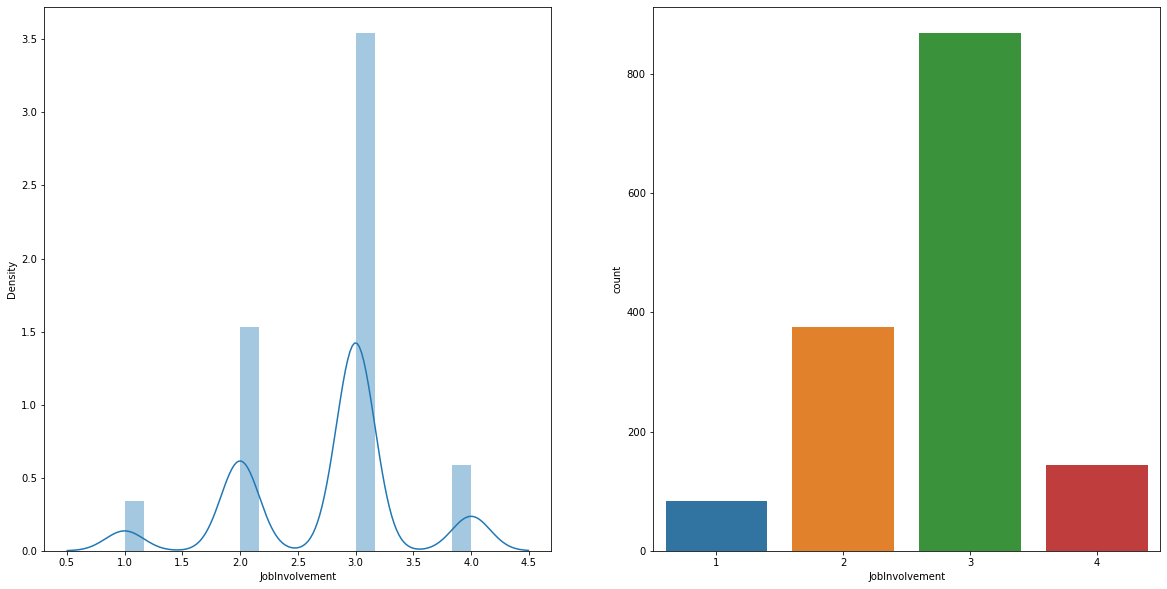

In [33]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['JobInvolvement'],ax=fig.add_subplot(1,2,1))
sns.countplot(x=df['JobInvolvement'],ax=fig.add_subplot(1,2,2))
plt.show()

1] This feature is categorical in Nature.

2] JobInvolvement has 4 catrgories from 1 to 4

3] 3 category has highest contribution in data set.

4] 1 has lowest contribution.

* JobLevel

In [34]:
df['JobLevel'].describe()

count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64

In [35]:
df['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

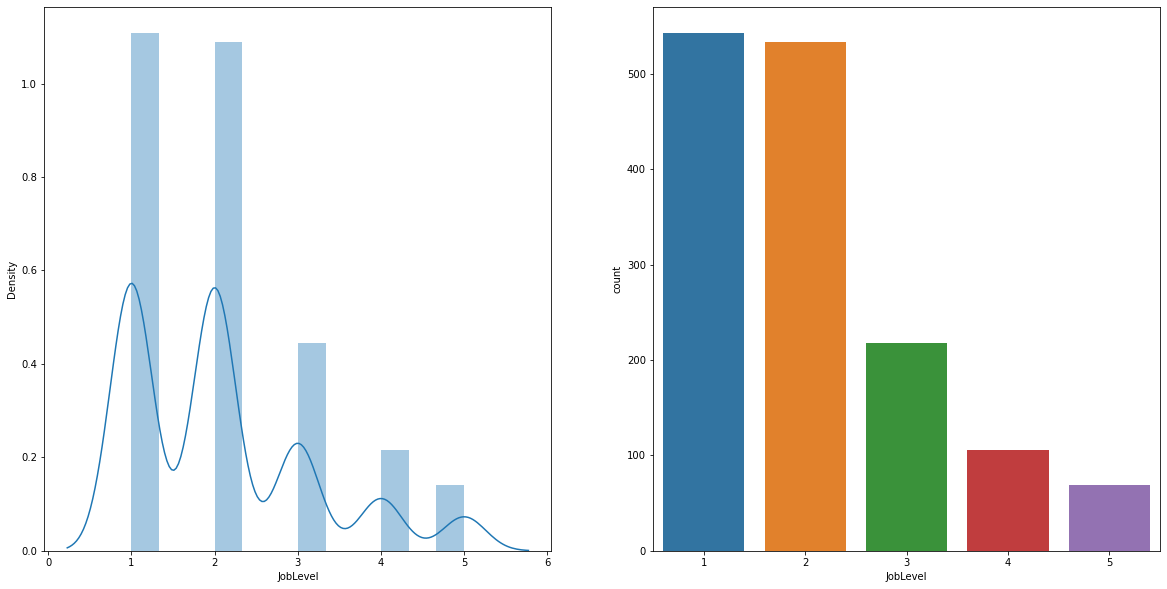

In [36]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['JobLevel'],ax=fig.add_subplot(1,2,1))
sns.countplot(x=df['JobLevel'],ax=fig.add_subplot(1,2,2))
plt.show()

1] JobLevel feature is categorical feature with 5 categories from 1 to 5

2] 1 and 2 levels contributing upto 50 % of feature data.

3] 5 level has lowest contribution.

* JoSatisfaction

In [37]:
df['JobSatisfaction'].describe()

count    1470.000000
mean        2.728571
std         1.102846
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

In [38]:
df['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

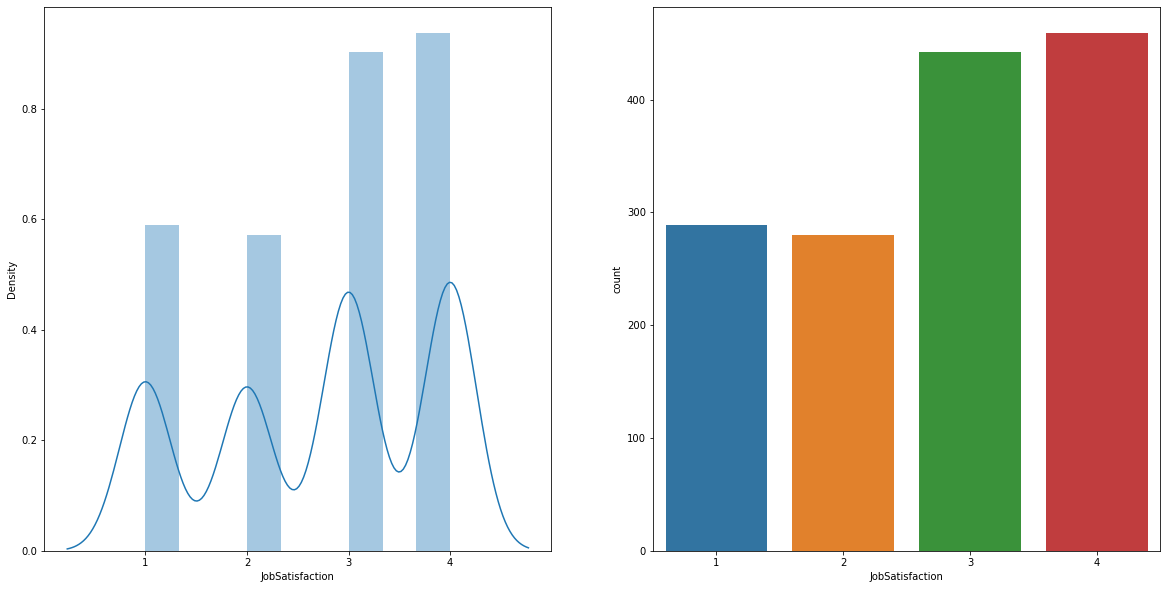

In [39]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['JobSatisfaction'],ax=fig.add_subplot(1,2,1))
sns.countplot(x=df['JobSatisfaction'],ax=fig.add_subplot(1,2,2))
plt.show()

1] JonSatisfaction categorical in nature with 4 categories in feature from 1 to 4.

2] 3 and 4 category have more than 50% contribution in data

* MonthlyIncome

In [40]:
df['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

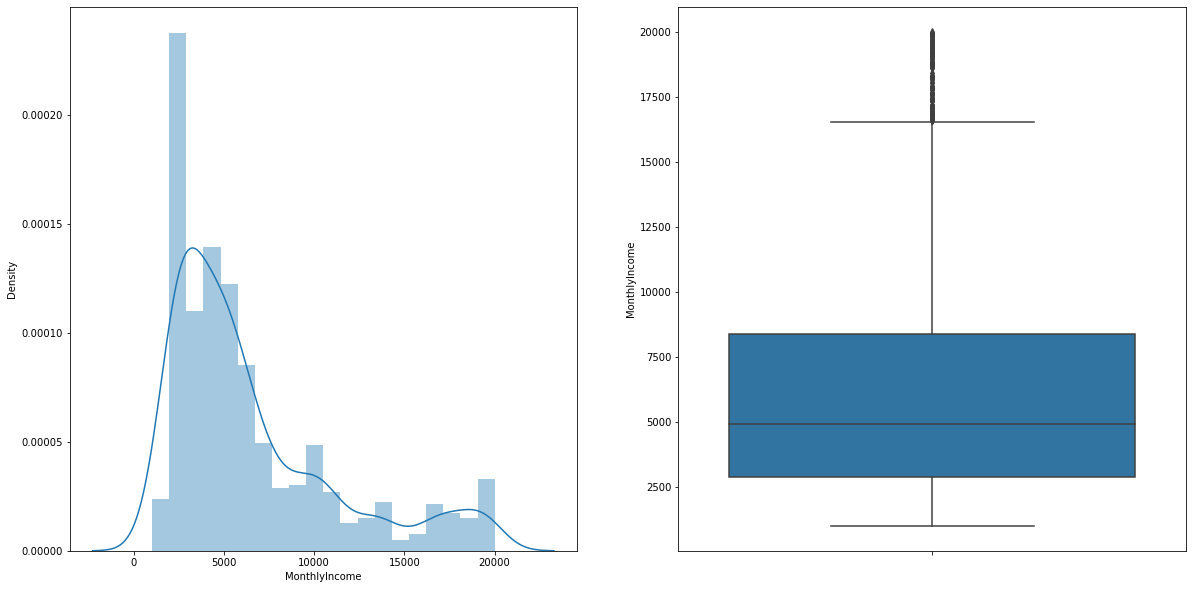

In [41]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['MonthlyIncome'],ax=fig.add_subplot(1,2,1))
sns.boxplot(y=df['MonthlyIncome'],ax=fig.add_subplot(1,2,2))
plt.show()

1] It is Continuous feature with mean of 6502 and median of 4919

2] distribution is positively skewed hence outliers are also present in feature.which can be observed with boxplot

* MonthlyRate

In [42]:
df['MonthlyRate'].describe()

count     1470.000000
mean     14313.103401
std       7117.786044
min       2094.000000
25%       8047.000000
50%      14235.500000
75%      20461.500000
max      26999.000000
Name: MonthlyRate, dtype: float64

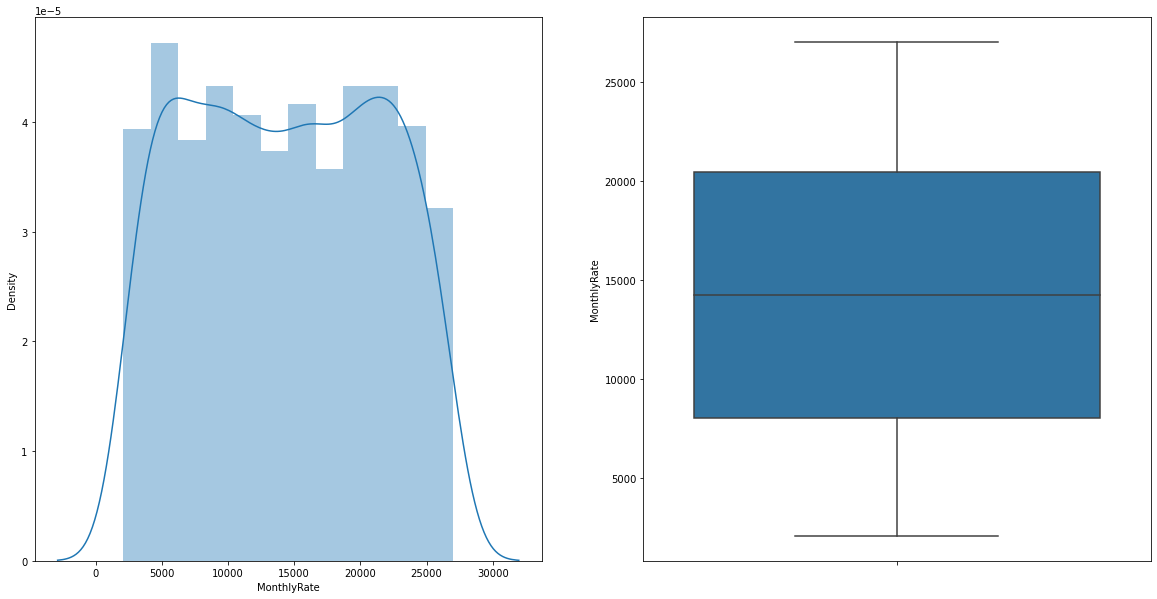

In [43]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['MonthlyRate'],ax=fig.add_subplot(1,2,1))
sns.boxplot(y=df['MonthlyRate'],ax=fig.add_subplot(1,2,2))
plt.show()

1] There are no outliers in this feature.

2] Distribution is also not skewed.

* NumCompaniesWorked

In [44]:
df['NumCompaniesWorked'].unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64)

In [45]:
df['NumCompaniesWorked'].describe()

count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

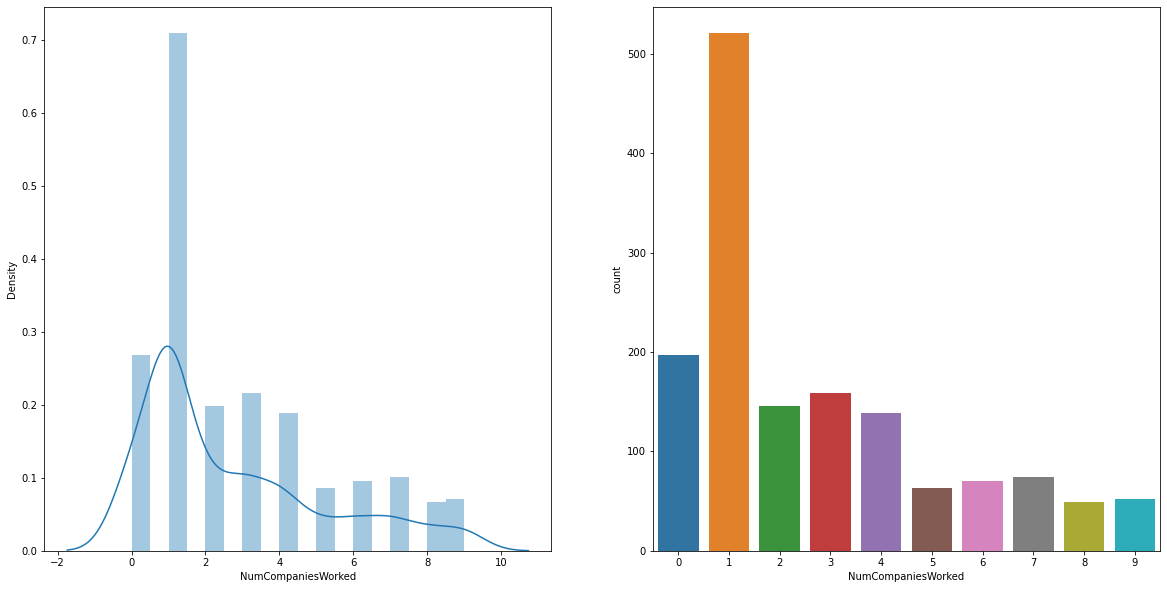

In [46]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['NumCompaniesWorked'],ax=fig.add_subplot(1,2,1))
sns.countplot(x=df['NumCompaniesWorked'],ax=fig.add_subplot(1,2,2))
plt.show()

1] NumCompniesWorked feature has 10 categories from 0 to 9

2] 1 category have highest contribution in feature more than 25%.

* PercentSalaryHike

In [47]:
df['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25],
      dtype=int64)

In [48]:
df['PercentSalaryHike'].describe()

count    1470.000000
mean       15.209524
std         3.659938
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

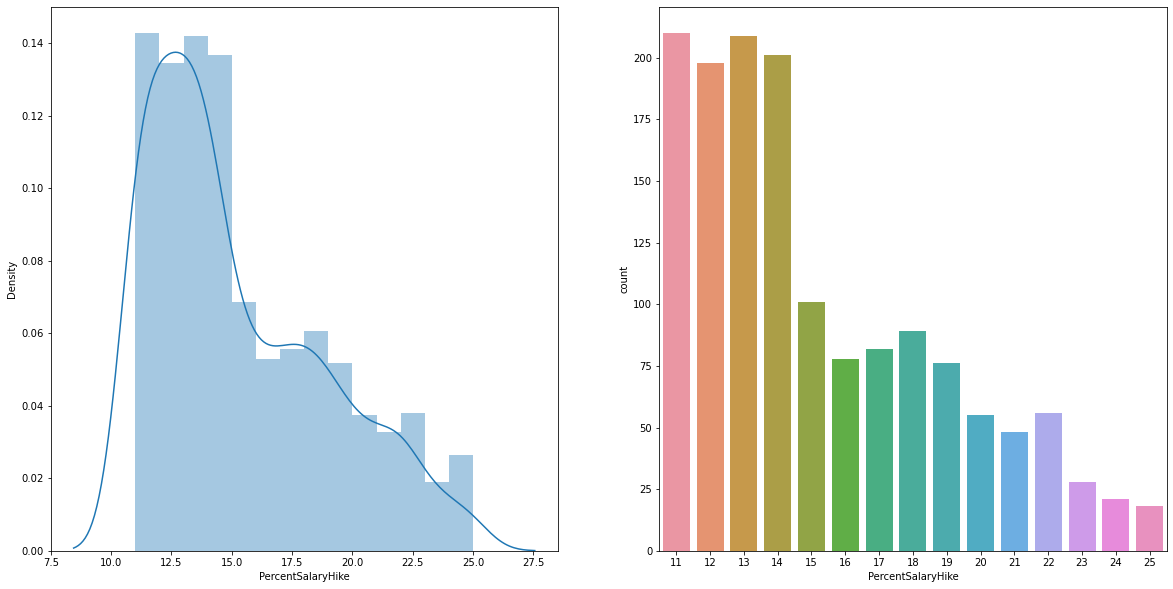

In [49]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['PercentSalaryHike'],ax=fig.add_subplot(1,2,1))
sns.countplot(x=df['PercentSalaryHike'],ax=fig.add_subplot(1,2,2))
plt.show()

1] SAlary hike percentages are fixed for organizations.
 hence It can be cosidered as categorical in nature. also this variable is discrete in nature.
 
2] feature has 15 categories from 11 to 25 

3] lesss than 14% slary hike has highest contribution 

* PerformanceRating

In [50]:
df['PerformanceRating'].describe()

count    1470.000000
mean        3.153741
std         0.360824
min         3.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: PerformanceRating, dtype: float64

In [51]:
df['PerformanceRating'].unique()

array([3, 4], dtype=int64)

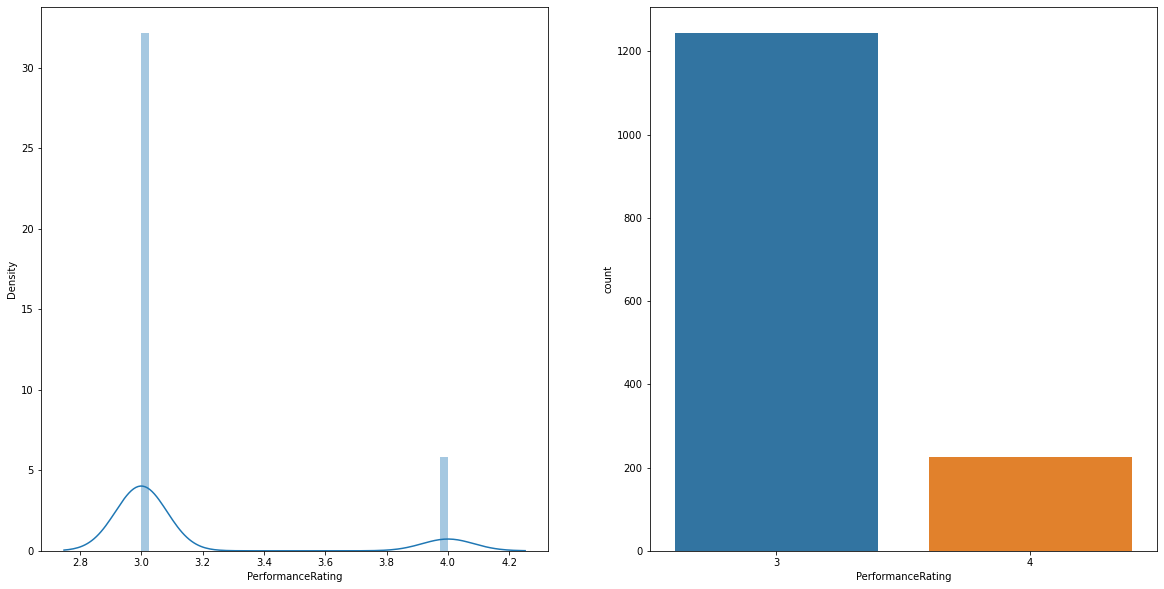

In [52]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['PerformanceRating'],ax=fig.add_subplot(1,2,1))
sns.countplot(x=df['PerformanceRating'],ax=fig.add_subplot(1,2,2))
plt.show()

1] PerformanceRating is binomial feature with 3 and 4

2] 3 has highest contributon with upto 75% .

* RelationshipSatisfaction

In [53]:
df['RelationshipSatisfaction'].describe()

count    1470.000000
mean        2.712245
std         1.081209
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: RelationshipSatisfaction, dtype: float64

In [54]:
df['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3], dtype=int64)

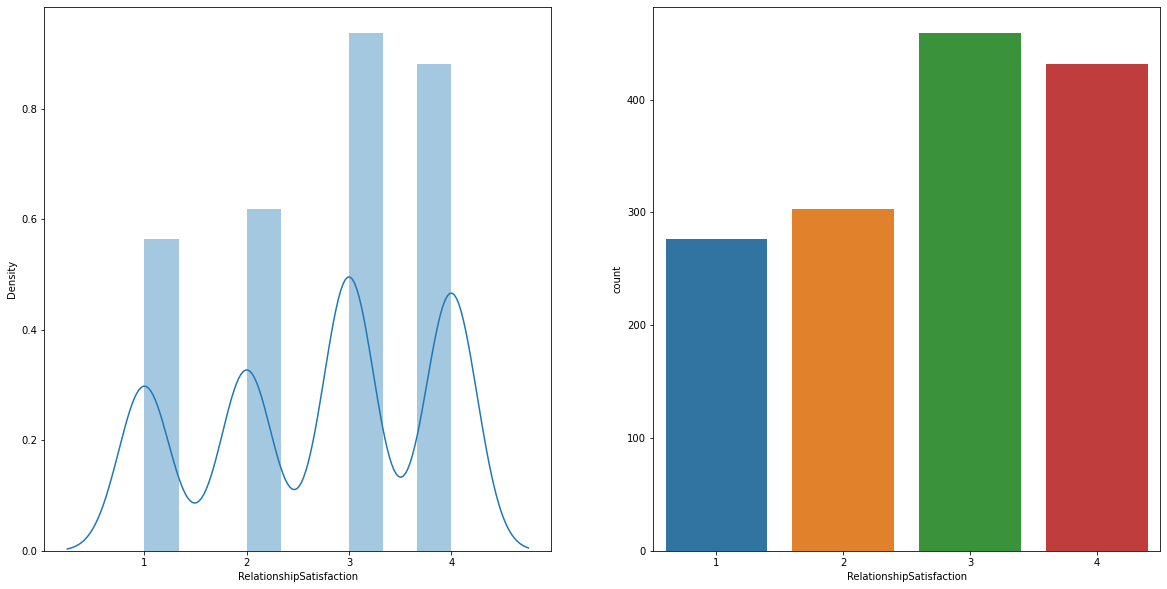

In [55]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['RelationshipSatisfaction'],ax=fig.add_subplot(1,2,1))
sns.countplot(x=df['RelationshipSatisfaction'],ax=fig.add_subplot(1,2,2))
plt.show()

1] RelationshipSatisfaction has 4 categories with 3 and 4 have large amount of conrtribution.

* StandardHours

In [56]:
df['StandardHours'].unique()

array([80], dtype=int64)

In [57]:
df['StandardHours'].describe()

count    1470.0
mean       80.0
std         0.0
min        80.0
25%        80.0
50%        80.0
75%        80.0
max        80.0
Name: StandardHours, dtype: float64

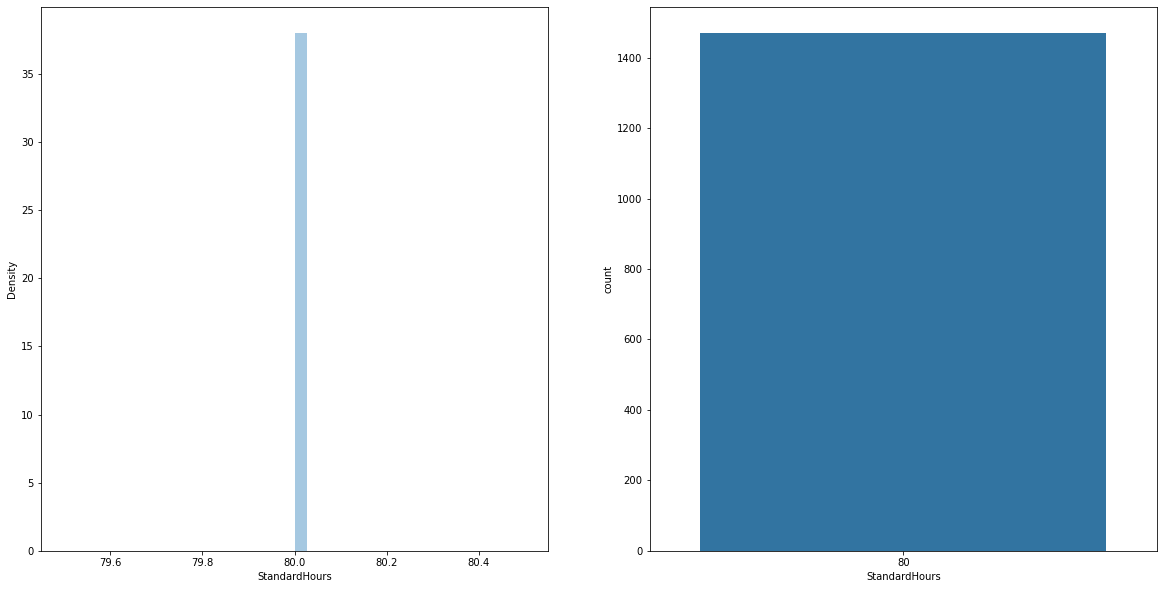

In [58]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['StandardHours'],ax=fig.add_subplot(1,2,1))
sns.countplot(x=df['StandardHours'],ax=fig.add_subplot(1,2,2))
plt.show()

1] Feature has only one value for all datapoints so we will eleiminat this feature.

* StockOptionLevel

In [59]:
df['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

In [60]:
df['StockOptionLevel'].describe()

count    1470.000000
mean        0.793878
std         0.852077
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: StockOptionLevel, dtype: float64

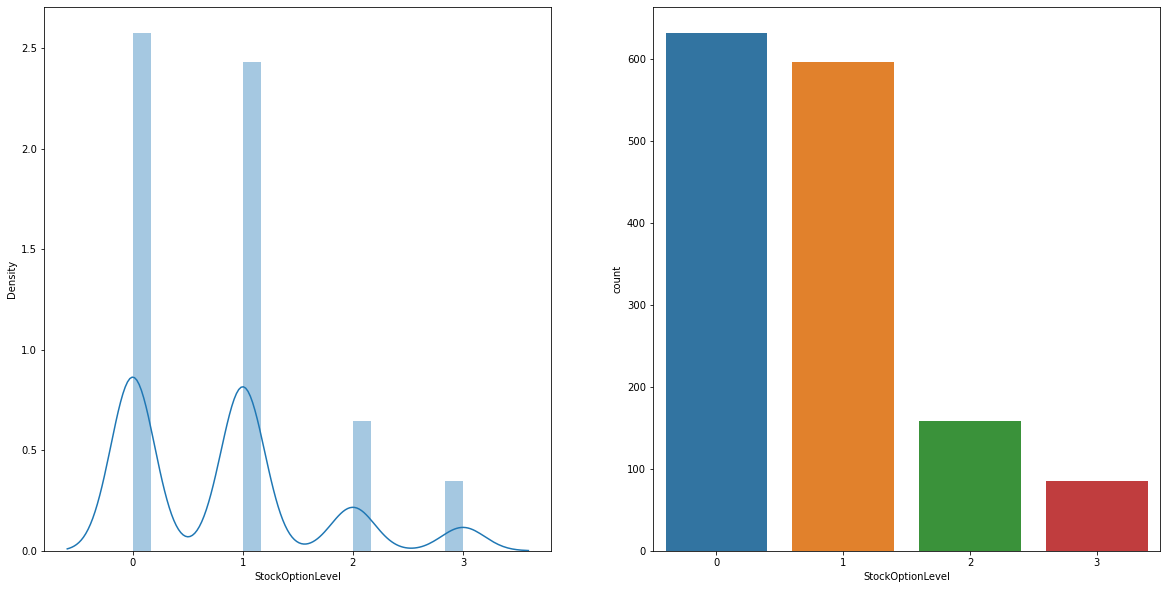

In [61]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['StockOptionLevel'],ax=fig.add_subplot(1,2,1))
sns.countplot(x=df['StockOptionLevel'],ax=fig.add_subplot(1,2,2))
plt.show()

1] StockOptionLevel has 4 categories from 0 to3 

2] o and 1 have large contribution .

* TotalWorkingYears

In [62]:
df['TotalWorkingYears'].describe()

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

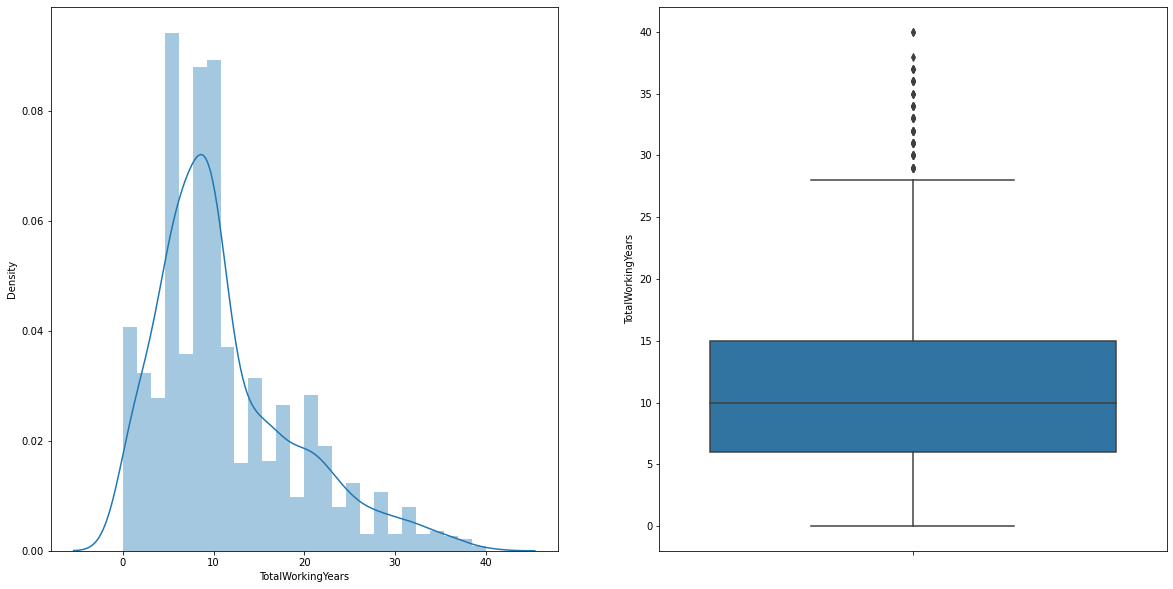

In [63]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['TotalWorkingYears'],ax=fig.add_subplot(1,2,1))
sns.boxplot(y=df['TotalWorkingYears'],ax=fig.add_subplot(1,2,2))
plt.show()

1] mean of feature is 11 and median is 10 standard deviation of variale is 7


3] Distributon is positively skewed and outliers are detected in boxplot.

* TrainingTimesLastYear

In [64]:
df['TrainingTimesLastYear'].describe()

count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64

In [65]:
df['TrainingTimesLastYear'].unique()

array([0, 3, 2, 5, 1, 4, 6], dtype=int64)

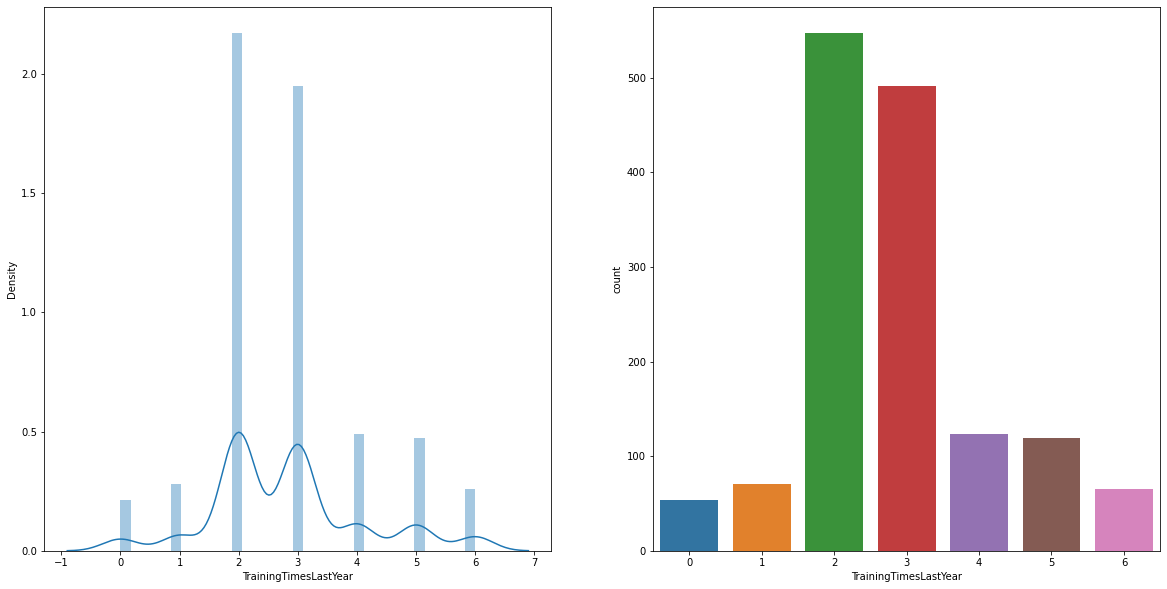

In [66]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['TrainingTimesLastYear'],ax=fig.add_subplot(1,2,1))
sns.countplot(x=df['TrainingTimesLastYear'],ax=fig.add_subplot(1,2,2))
plt.show()

1] TrainingTimeLastYear is categorical in nature

2] feature has 7 categories from 0 to 6

3] 2 and 3 category has contribution. 

* WorkLifeBalance

In [67]:
df['WorkLifeBalance'].unique()

array([1, 3, 2, 4], dtype=int64)

In [68]:
df['WorkLifeBalance'].describe()

count    1470.000000
mean        2.761224
std         0.706476
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64

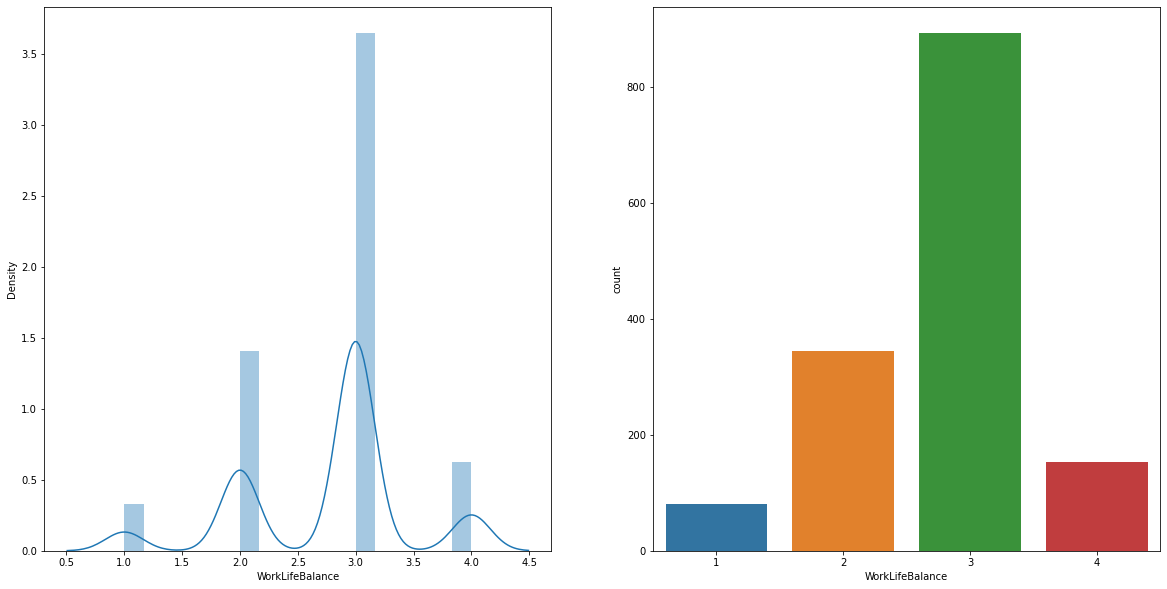

In [69]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['WorkLifeBalance'],ax=fig.add_subplot(1,2,1))
sns.countplot(x=df['WorkLifeBalance'],ax=fig.add_subplot(1,2,2))
plt.show()

1] WorklifeBalance is categorical in Nature.

2] feature has 4 categories from 1 to 4 

3] 3 with highest contribution.

* YearsAtCompany

In [70]:
df['YearsAtCompany'].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

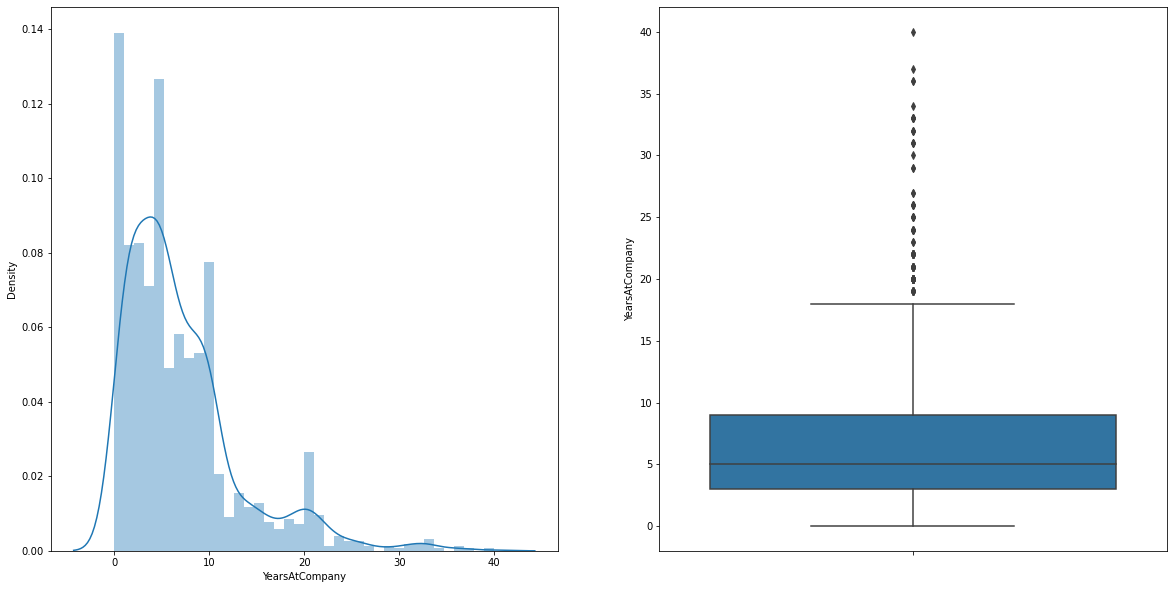

In [71]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['YearsAtCompany'],ax=fig.add_subplot(1,2,1))
sns.boxplot(y=df['YearsAtCompany'],ax=fig.add_subplot(1,2,2))
plt.show()

1] feature is positively skewed with outliers at highside.

2] mean is 7 meaidan is 5 hence distribution is skewed.there very less outliers in features.

* YearsInCurrentRole

In [72]:
df['YearsInCurrentRole'].describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

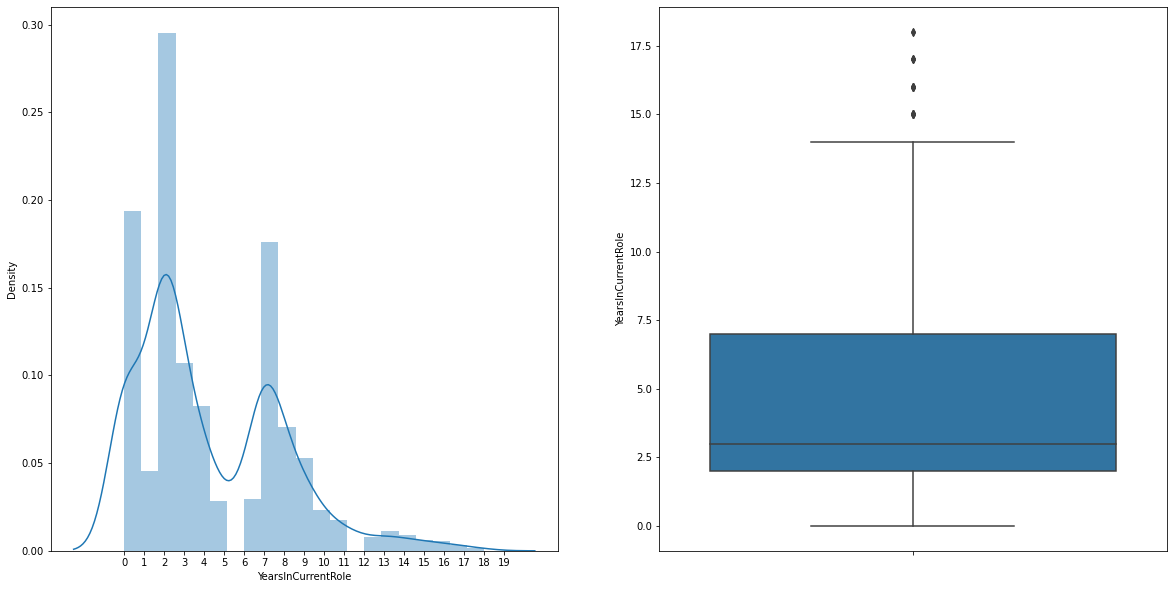

In [73]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['YearsInCurrentRole'],ax=fig.add_subplot(1,2,1))
plt.xticks(range(0,20))
sns.boxplot(y=df['YearsInCurrentRole'],ax=fig.add_subplot(1,2,2))
plt.show()

1] YearSinCurrentRole is featre having number of years continuous in nature.


* YearsSinceLastPromotion

In [74]:
df['YearsSinceLastPromotion'].describe()

count    1470.000000
mean        2.187755
std         3.222430
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        15.000000
Name: YearsSinceLastPromotion, dtype: float64

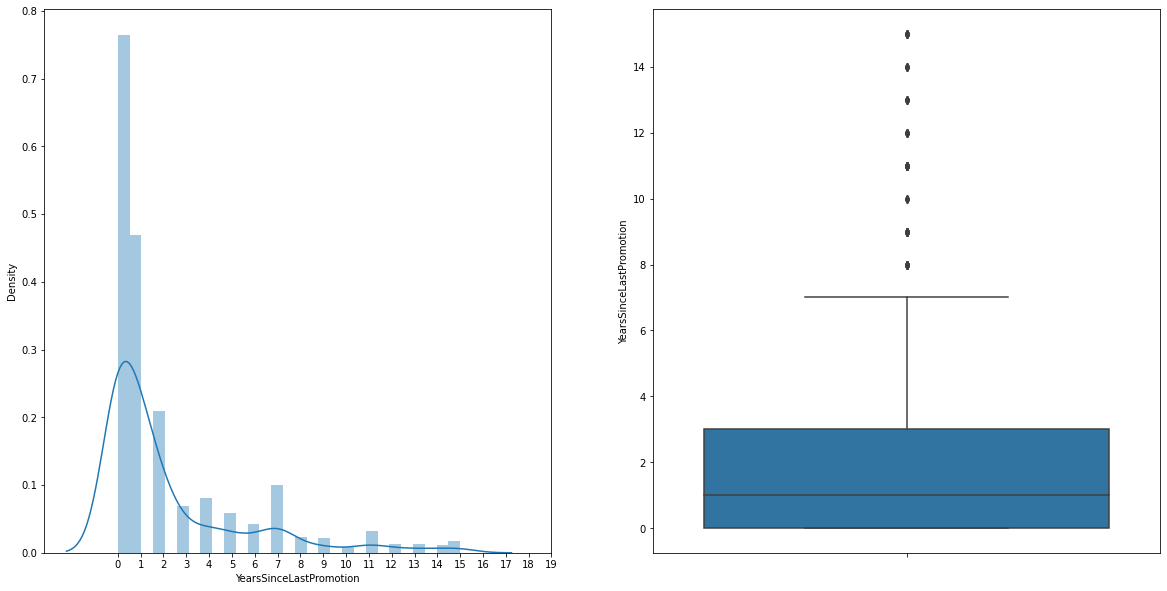

In [75]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['YearsSinceLastPromotion'],ax=fig.add_subplot(1,2,1))
plt.xticks(range(0,20))
sns.boxplot(y=df['YearsSinceLastPromotion'],ax=fig.add_subplot(1,2,2))
plt.show()

1] YearsSinLastPromtion is also number of years having skewed data.

* YearsWithCurrManager

In [76]:
df['YearsWithCurrManager'].describe()

count    1470.000000
mean        4.123129
std         3.568136
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        17.000000
Name: YearsWithCurrManager, dtype: float64

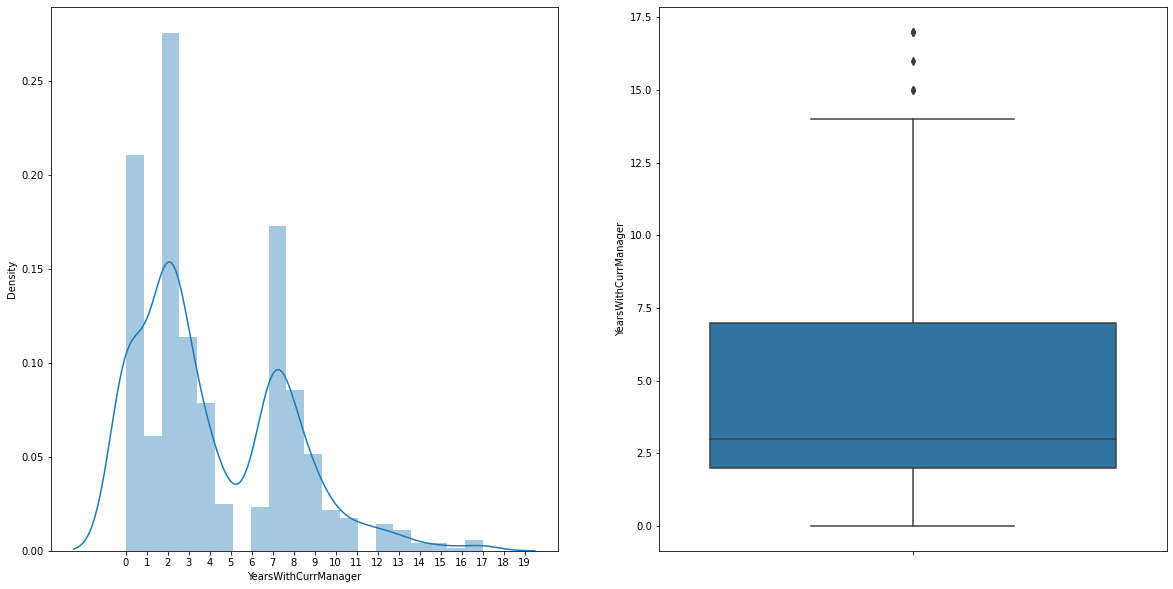

In [77]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df['YearsWithCurrManager'],ax=fig.add_subplot(1,2,1))
plt.xticks(range(0,20))
sns.boxplot(y=df['YearsWithCurrManager'],ax=fig.add_subplot(1,2,2))
plt.show()

1] Skewed data with OUtliers in highside.

* features with objectDatatypes

In [78]:
alpha_features

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

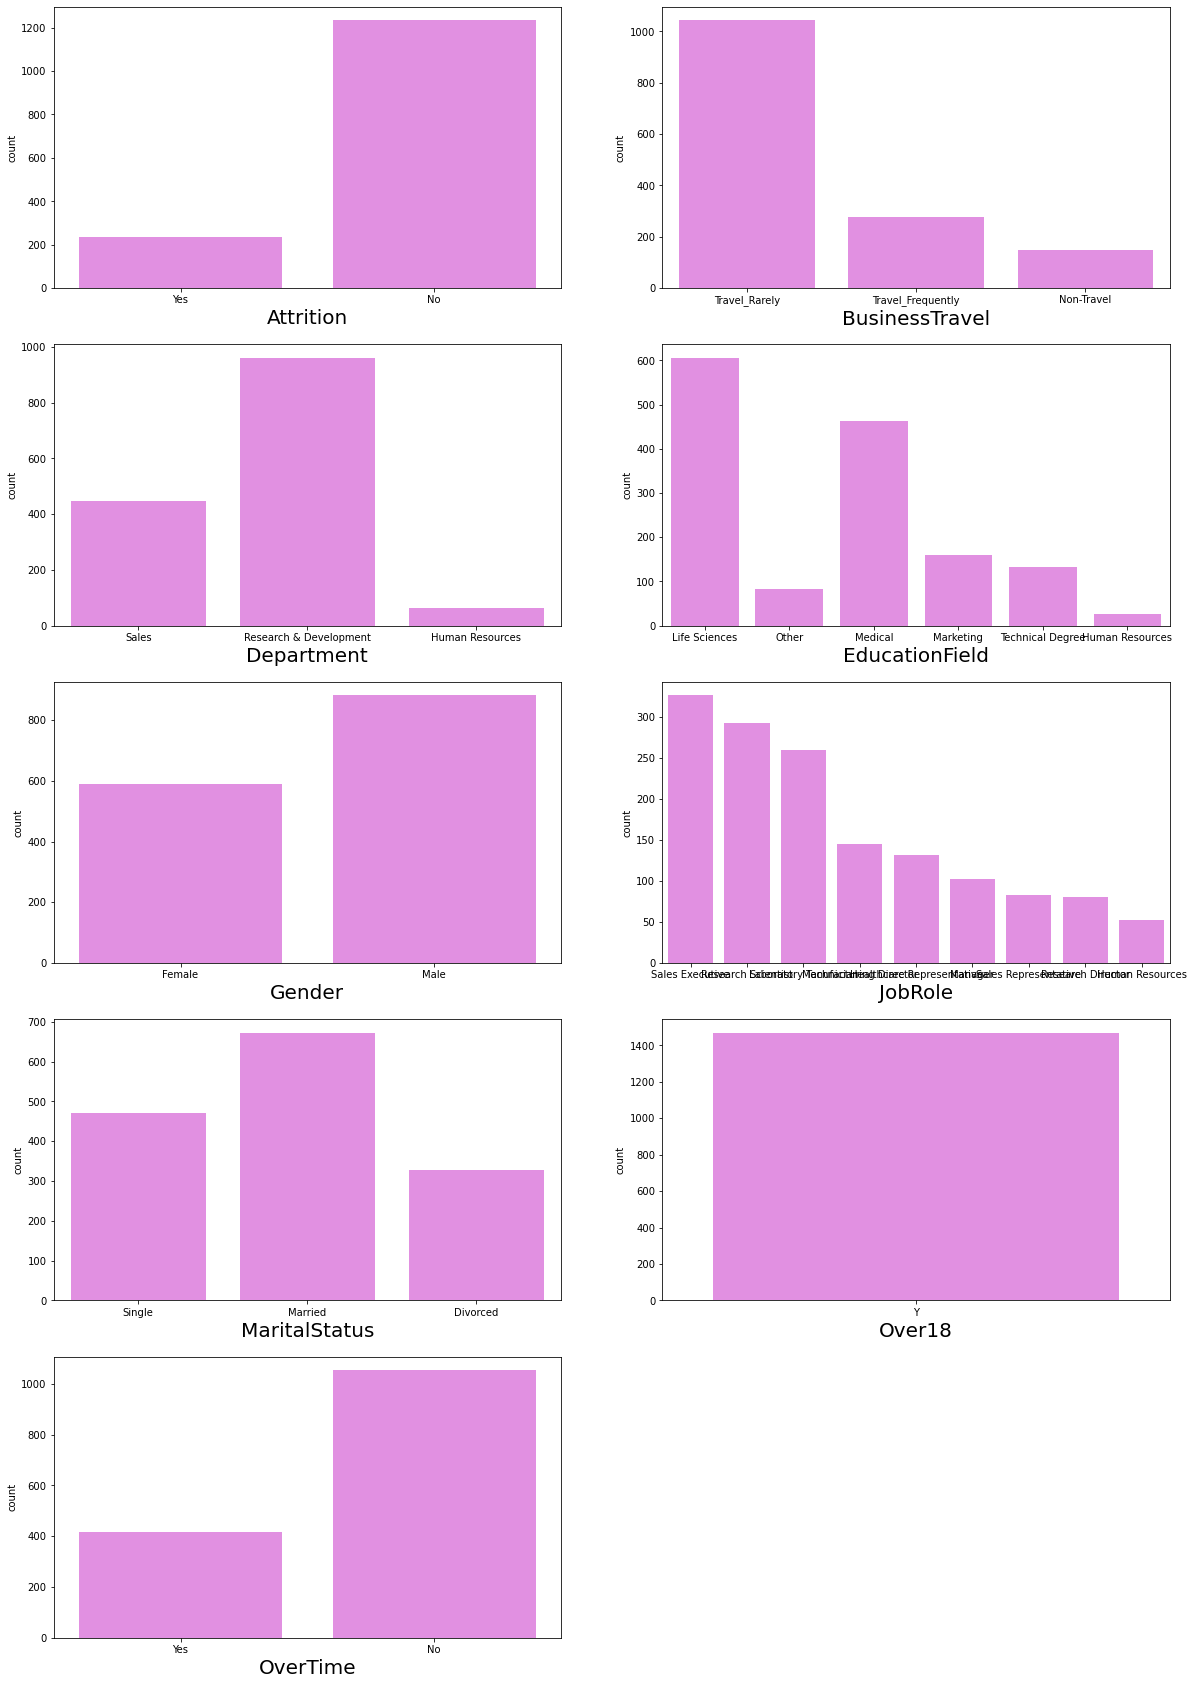

<Figure size 432x288 with 0 Axes>

In [79]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in alpha_features:
    if graph<=9:
        ax=plt.subplot(5,2,graph)
        sns.countplot(df[column],color='violet')
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

* Analysis of object Datatype features caeories and thier proportion or contribution.

In [80]:
for i in alpha_features:
    print(i,"\n")
    print(df[i].unique())
    print('----------------------------------\n')
    print(df[i].value_counts(),'\n')
    print('----------------------------------\n')

Attrition 

['Yes' 'No']
----------------------------------

No     1233
Yes     237
Name: Attrition, dtype: int64 

----------------------------------

BusinessTravel 

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
----------------------------------

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

----------------------------------

Department 

['Sales' 'Research & Development' 'Human Resources']
----------------------------------

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

----------------------------------

EducationField 

['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
----------------------------------

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

-----------

In [81]:
df["Over18"].unique()

array(['Y'], dtype=object)

* As Over18 feature has only one value hence we will remove this featue.

* Eliminating EmployeeCount ,EmployeeNumber and StandardHours,Over18 from dataframe.

In [82]:
df=df.drop(columns=['EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1)

In [83]:
df.shape

(1470, 31)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [85]:
alpha_features=df.columns[df.dtypes==np.object]
numeric_features=df.columns[df.dtypes!=np.object]

* lets Encode object dtypes feature in numeric datatype

In [86]:
from sklearn.preprocessing import LabelEncoder

In [87]:
le=LabelEncoder()
for i in alpha_features:
    df[i]=le.fit_transform(df[i])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int32
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int32
 14  JobSatisfaction           1470 non-null 

*continuousFeatures

In [89]:
cont=['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [90]:
cat=[]
for i in df.columns:
    if i not in cont:
        cat.append(i)

In [91]:
len(df.columns)==len(cat)+len(cont)

True

In [92]:
mix=[]
for i,j in zip(cont,cat):
    if str(i)==str(j):
        mix.append(i)
mix        

[]

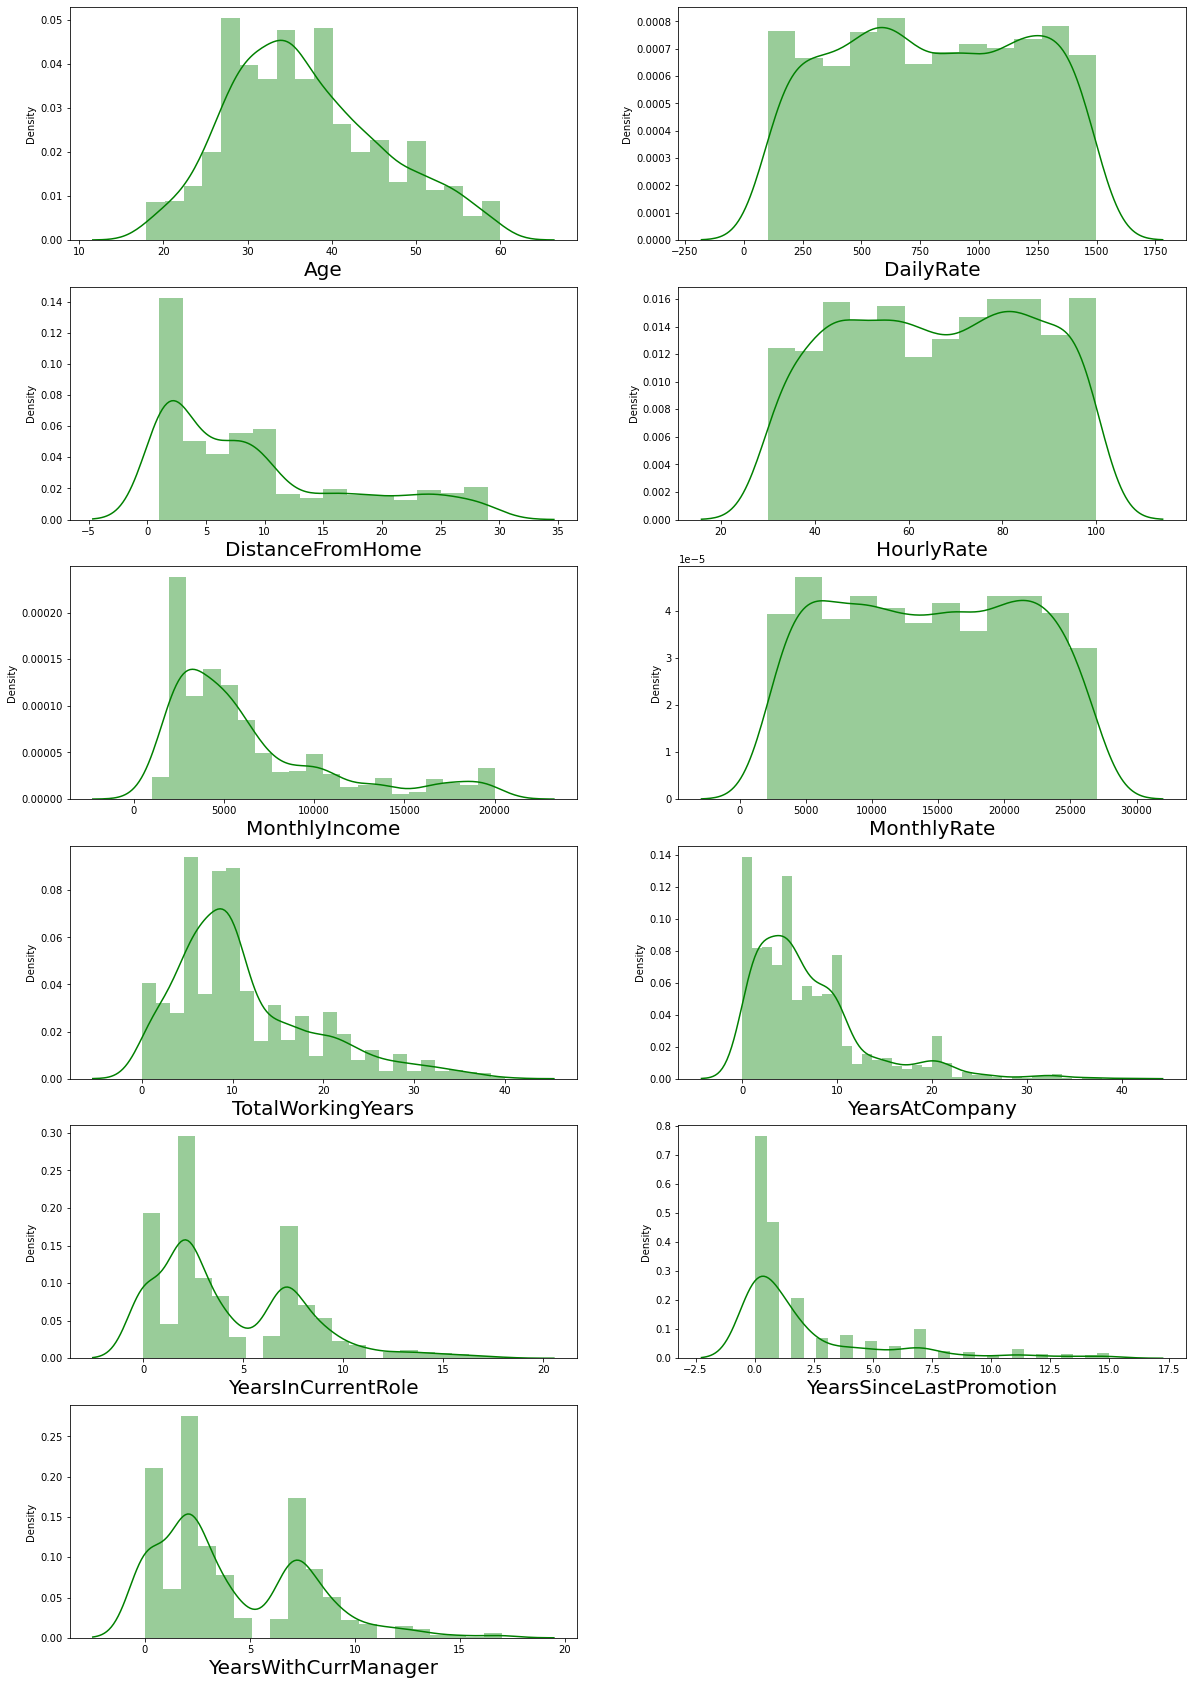

<Figure size 432x288 with 0 Axes>

In [93]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=len(cont):
        ax=plt.subplot(6,2,graph)
        sns.distplot(df[column],color='green')
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

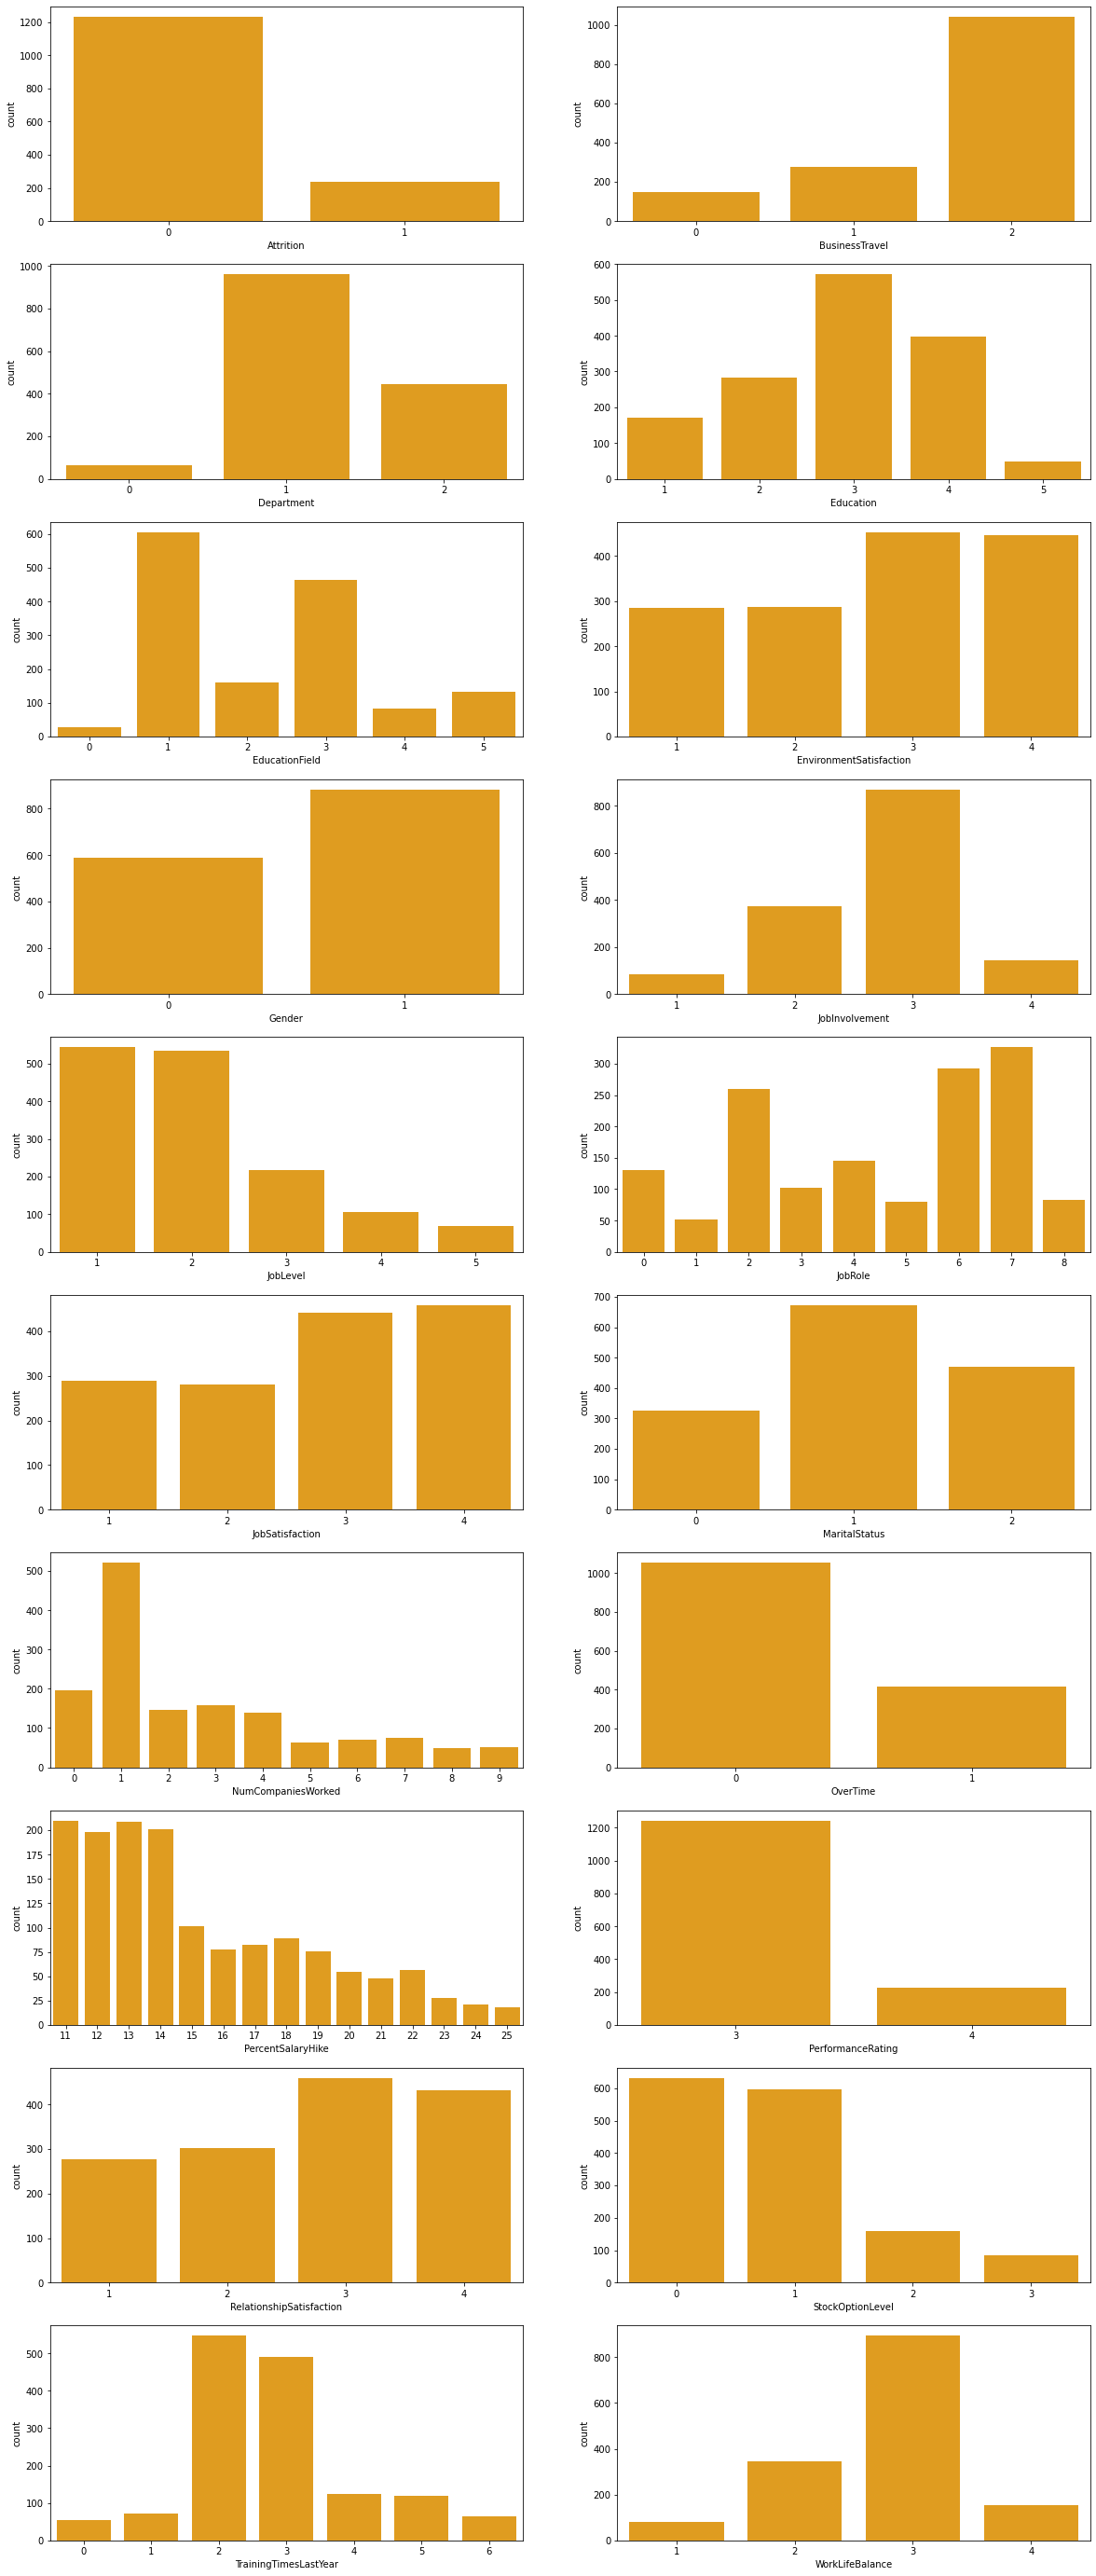

<Figure size 432x288 with 0 Axes>

In [94]:
plt.figure(figsize=(20,50))
sns.set_palette('bright')
graph=1

for column in cat:
    if graph<=len(cat):
        ax=plt.subplot(10,2,graph)
        sns.countplot(df[column],color='orange')
        plt.xlabel(column,fontsize=10)
        
    graph+=1
plt.show()
plt.tight_layout()

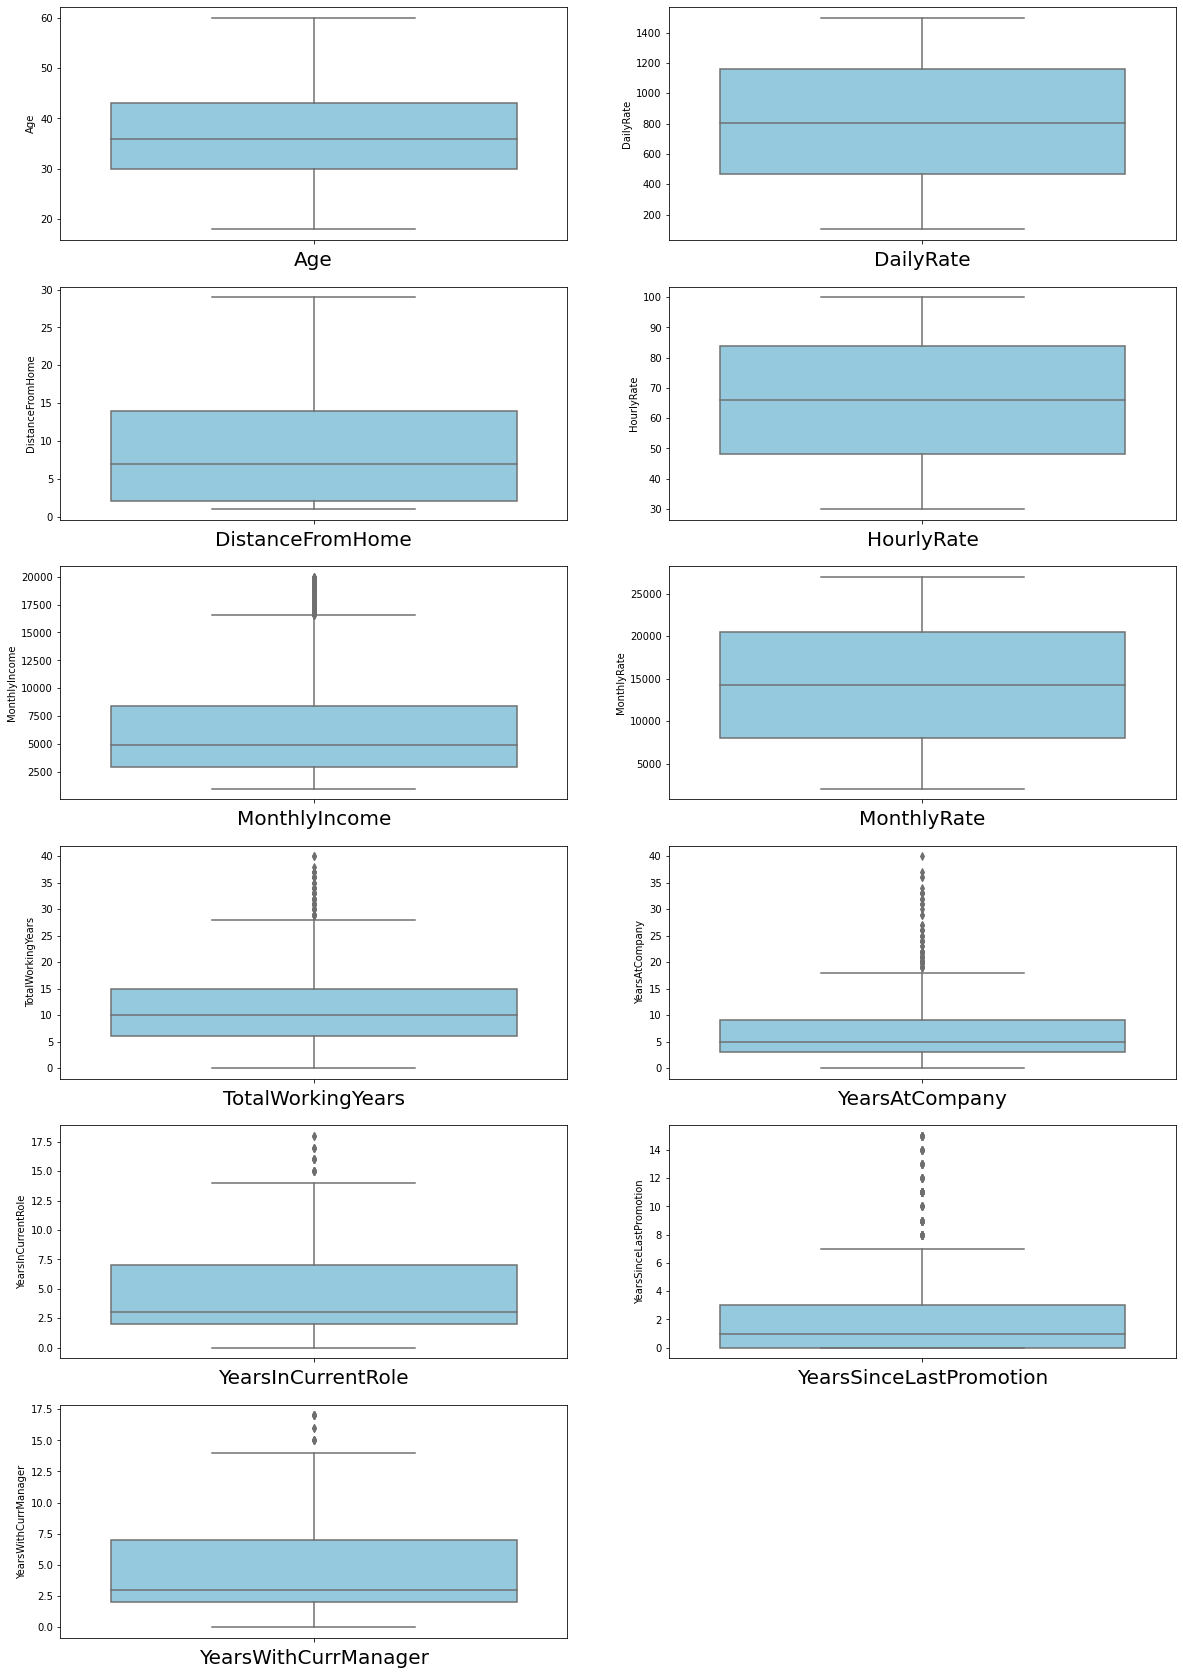

<Figure size 432x288 with 0 Axes>

In [95]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=len(cont):
        ax=plt.subplot(6,2,graph)
        sns.boxplot(y=df[column],color='skyblue')
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

1] MonthlyIncome ,TotalWorkingYears,YearsINCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsAtCompany have outliers at highside.

* Analyzing Skewness

In [96]:
df[cont].skew()

Age                        0.413286
DailyRate                 -0.003519
DistanceFromHome           0.958118
HourlyRate                -0.032311
MonthlyIncome              1.369817
MonthlyRate                0.018578
TotalWorkingYears          1.117172
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64

<AxesSubplot:>

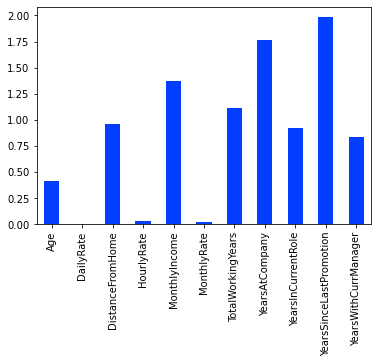

In [97]:
(np.abs(df[cont].skew())).plot.bar()

* lets define skewness of 0.5 for this scenario.

1] DistanceFromHome have high skewness of 0.95

2] MonthlyIncome have high skewness of 1.36

3] totalWorkingYears have high skewness of 1.12

4] YearAtCompany have high skewness of 1.76

5] YearsInCurrentRole have high skewness of 0.91

6] YearsSinLastPromotion have high skewness of 1.98

7] YearsWithCurrManager have high skewness of 0.83


In [98]:
features=df.columns[df.columns!='Attrition']
features

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

* Features relation with Attrition 

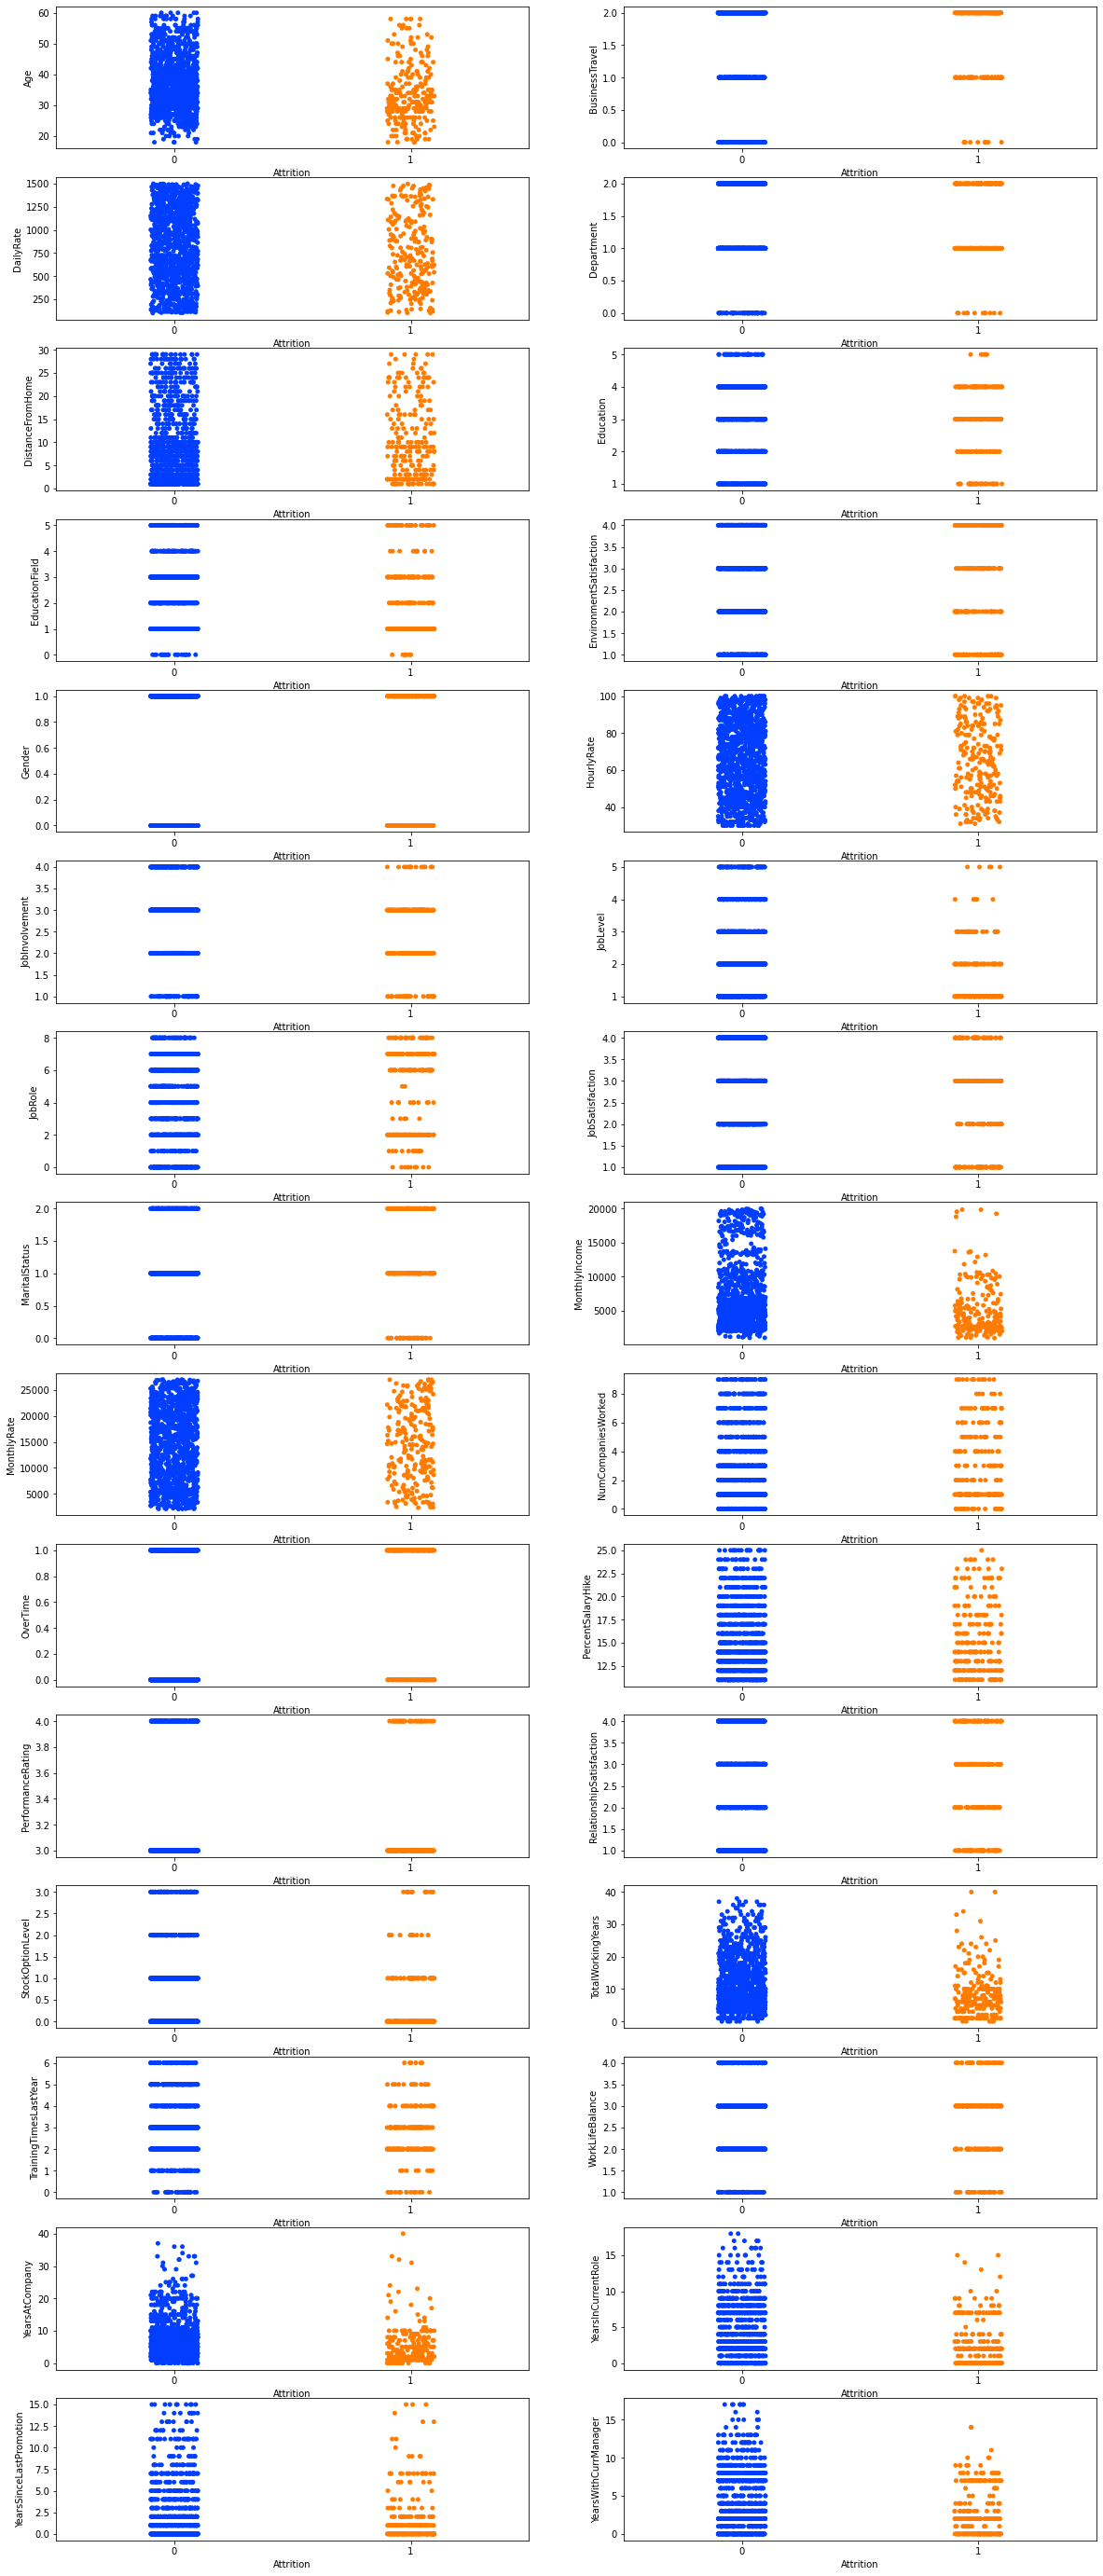

<Figure size 432x288 with 0 Axes>

In [99]:
plt.figure(figsize=(20,50))
sns.set_palette('bright')
graph=1

for column in features:
    if graph<=len(features):
        ax=plt.subplot(15,2,graph)
        sns.stripplot(x=df['Attrition'],y=df[column])
        plt.ylabel(column,fontsize=10)
        
    graph+=1
plt.show()
plt.tight_layout()

1] Large number of employees belong to No Attrition in Age feature, which include elder to older aged people in yes and No attrition

2] Attrition is not depended very much on BussinessTravel.

3] DailyRate,HourlyRate,MonthlyIncome,DistanceFromHome,PercentSalaryHike,YearsInCurrentRole,YearsWithCurrentManager,YearsAtCompany,YearsSinLastPromotion,TotalWorkingYears have Large number of employee belongs to No Attrition.



* Analyse outliers removal and data loss 

In [100]:
data=df.copy()
rows_before=data.shape[0]
rows_before

1470

In [101]:
from scipy.stats import zscore

z=np.abs(zscore(data[cont]))
data=data[(z<3).all(axis=1)]


In [102]:
rows_after=data.shape[0]
rows_after

1387

In [103]:
# data loss 
loss1=((rows_before-rows_after)/rows_before)*100
loss1

5.646258503401361

* Data Loss after removal of outliers is 5.65% so it can be safe to remove outliers with 
  z score method

* Analysis of Distribution of continuous feature before and after outliers removal

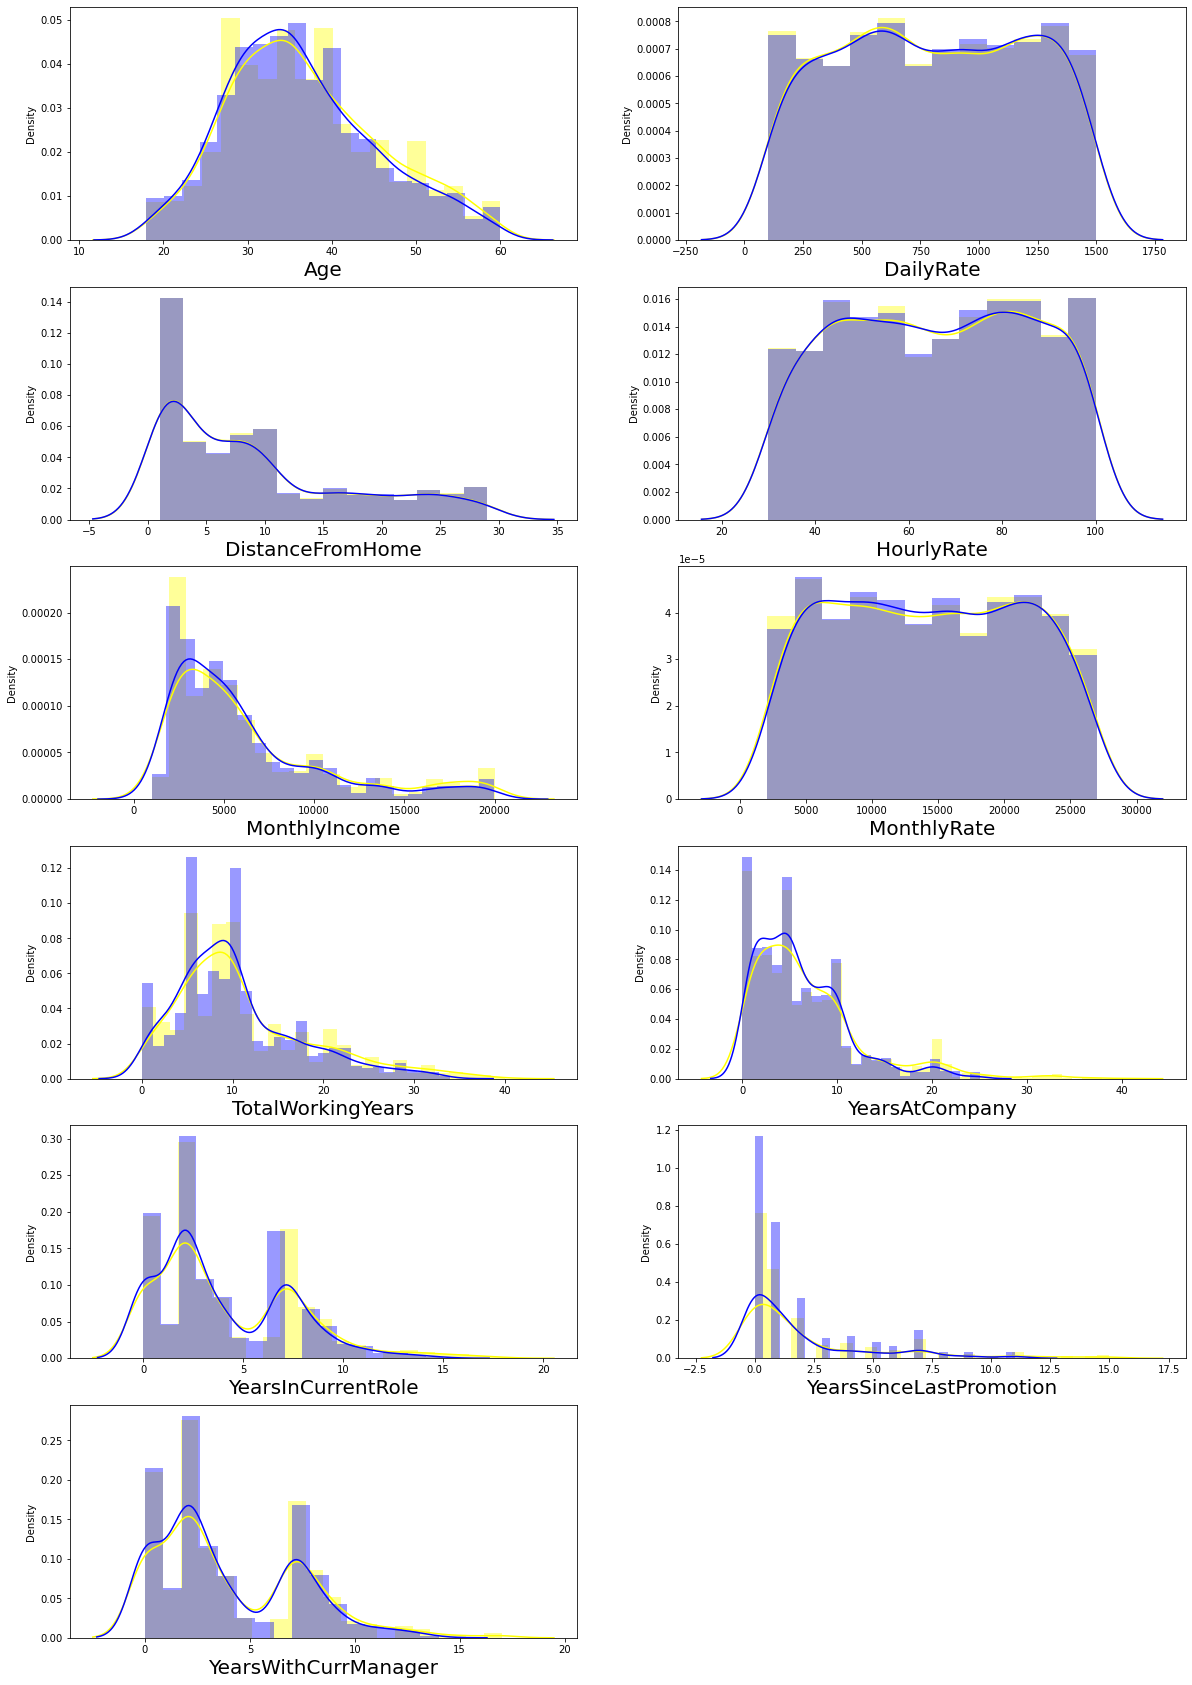

<Figure size 432x288 with 0 Axes>

In [104]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=len(cont):
        ax=plt.subplot(6,2,graph)
        sns.distplot(df[column],color='yellow')
        sns.distplot(data[column],color='blue')
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

* Lets remove outliers with zscore

In [105]:
# shape of dataset before outliers removal
df.shape

(1470, 31)

In [106]:
z1=np.abs(zscore(df[cont]))
df=df[(z1<3).all(axis=1)]


In [107]:
df.shape

(1387, 31)

In [108]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


* Correlation Analysis of variables

In [109]:
cor=df.corr().abs()
cor

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.159366,0.022340,0.021946,0.038242,0.011265,0.198502,0.032676,0.014098,0.039430,...,0.000617,0.041744,0.054506,0.636136,0.019008,0.016913,0.177620,0.121508,0.103632,0.121747
Attrition,0.159366,1.000000,0.001041,0.057220,0.063637,0.081788,0.032703,0.023585,0.112393,0.036252,...,0.010781,0.052344,0.136676,0.185619,0.057285,0.062492,0.166455,0.171015,0.029263,0.162297
BusinessTravel,0.022340,0.001041,1.000000,0.004606,0.003521,0.032873,0.010560,0.022576,0.001183,0.025364,...,0.018274,0.029660,0.015159,0.029818,0.010322,0.014140,0.027164,0.029257,0.027283,0.044321
DailyRate,0.021946,0.057220,0.004606,1.000000,0.005398,0.008171,0.018442,0.040645,0.033123,0.005242,...,0.000574,0.004516,0.048361,0.046173,0.005861,0.044266,0.003580,0.022899,0.043870,0.011516
Department,0.038242,0.063637,0.003521,0.005398,1.000000,0.023919,0.012846,0.013432,0.014540,0.030618,...,0.039364,0.037705,0.003424,0.016246,0.036092,0.026978,0.032583,0.065536,0.048931,0.034216
DistanceFromHome,0.011265,0.081788,0.032873,0.008171,0.023919,1.000000,0.001084,0.005882,0.019279,0.000819,...,0.023678,0.007885,0.049976,0.001092,0.034386,0.034398,0.011579,0.019039,0.006635,0.000221
Education,0.198502,0.032703,0.010560,0.018442,0.012846,0.001084,1.000000,0.038017,0.026223,0.019166,...,0.023487,0.002393,0.028494,0.125613,0.026879,0.007844,0.033313,0.058007,0.042517,0.031210
EducationField,0.032676,0.023585,0.022576,0.040645,0.013432,0.005882,0.038017,1.000000,0.047924,0.010676,...,0.003621,0.013734,0.015355,0.012375,0.050502,0.034038,0.012950,0.010614,0.034094,0.013437
EnvironmentSatisfaction,0.014098,0.112393,0.001183,0.033123,0.014540,0.019279,0.026223,0.047924,1.000000,0.015715,...,0.025299,0.018414,0.013330,0.001669,0.019318,0.032492,0.006621,0.038837,0.027943,0.001606
Gender,0.039430,0.036252,0.025364,0.005242,0.030618,0.000819,0.019166,0.010676,0.015715,1.000000,...,0.010757,0.041458,0.026438,0.058555,0.040211,0.000134,0.045123,0.025536,0.028162,0.036280


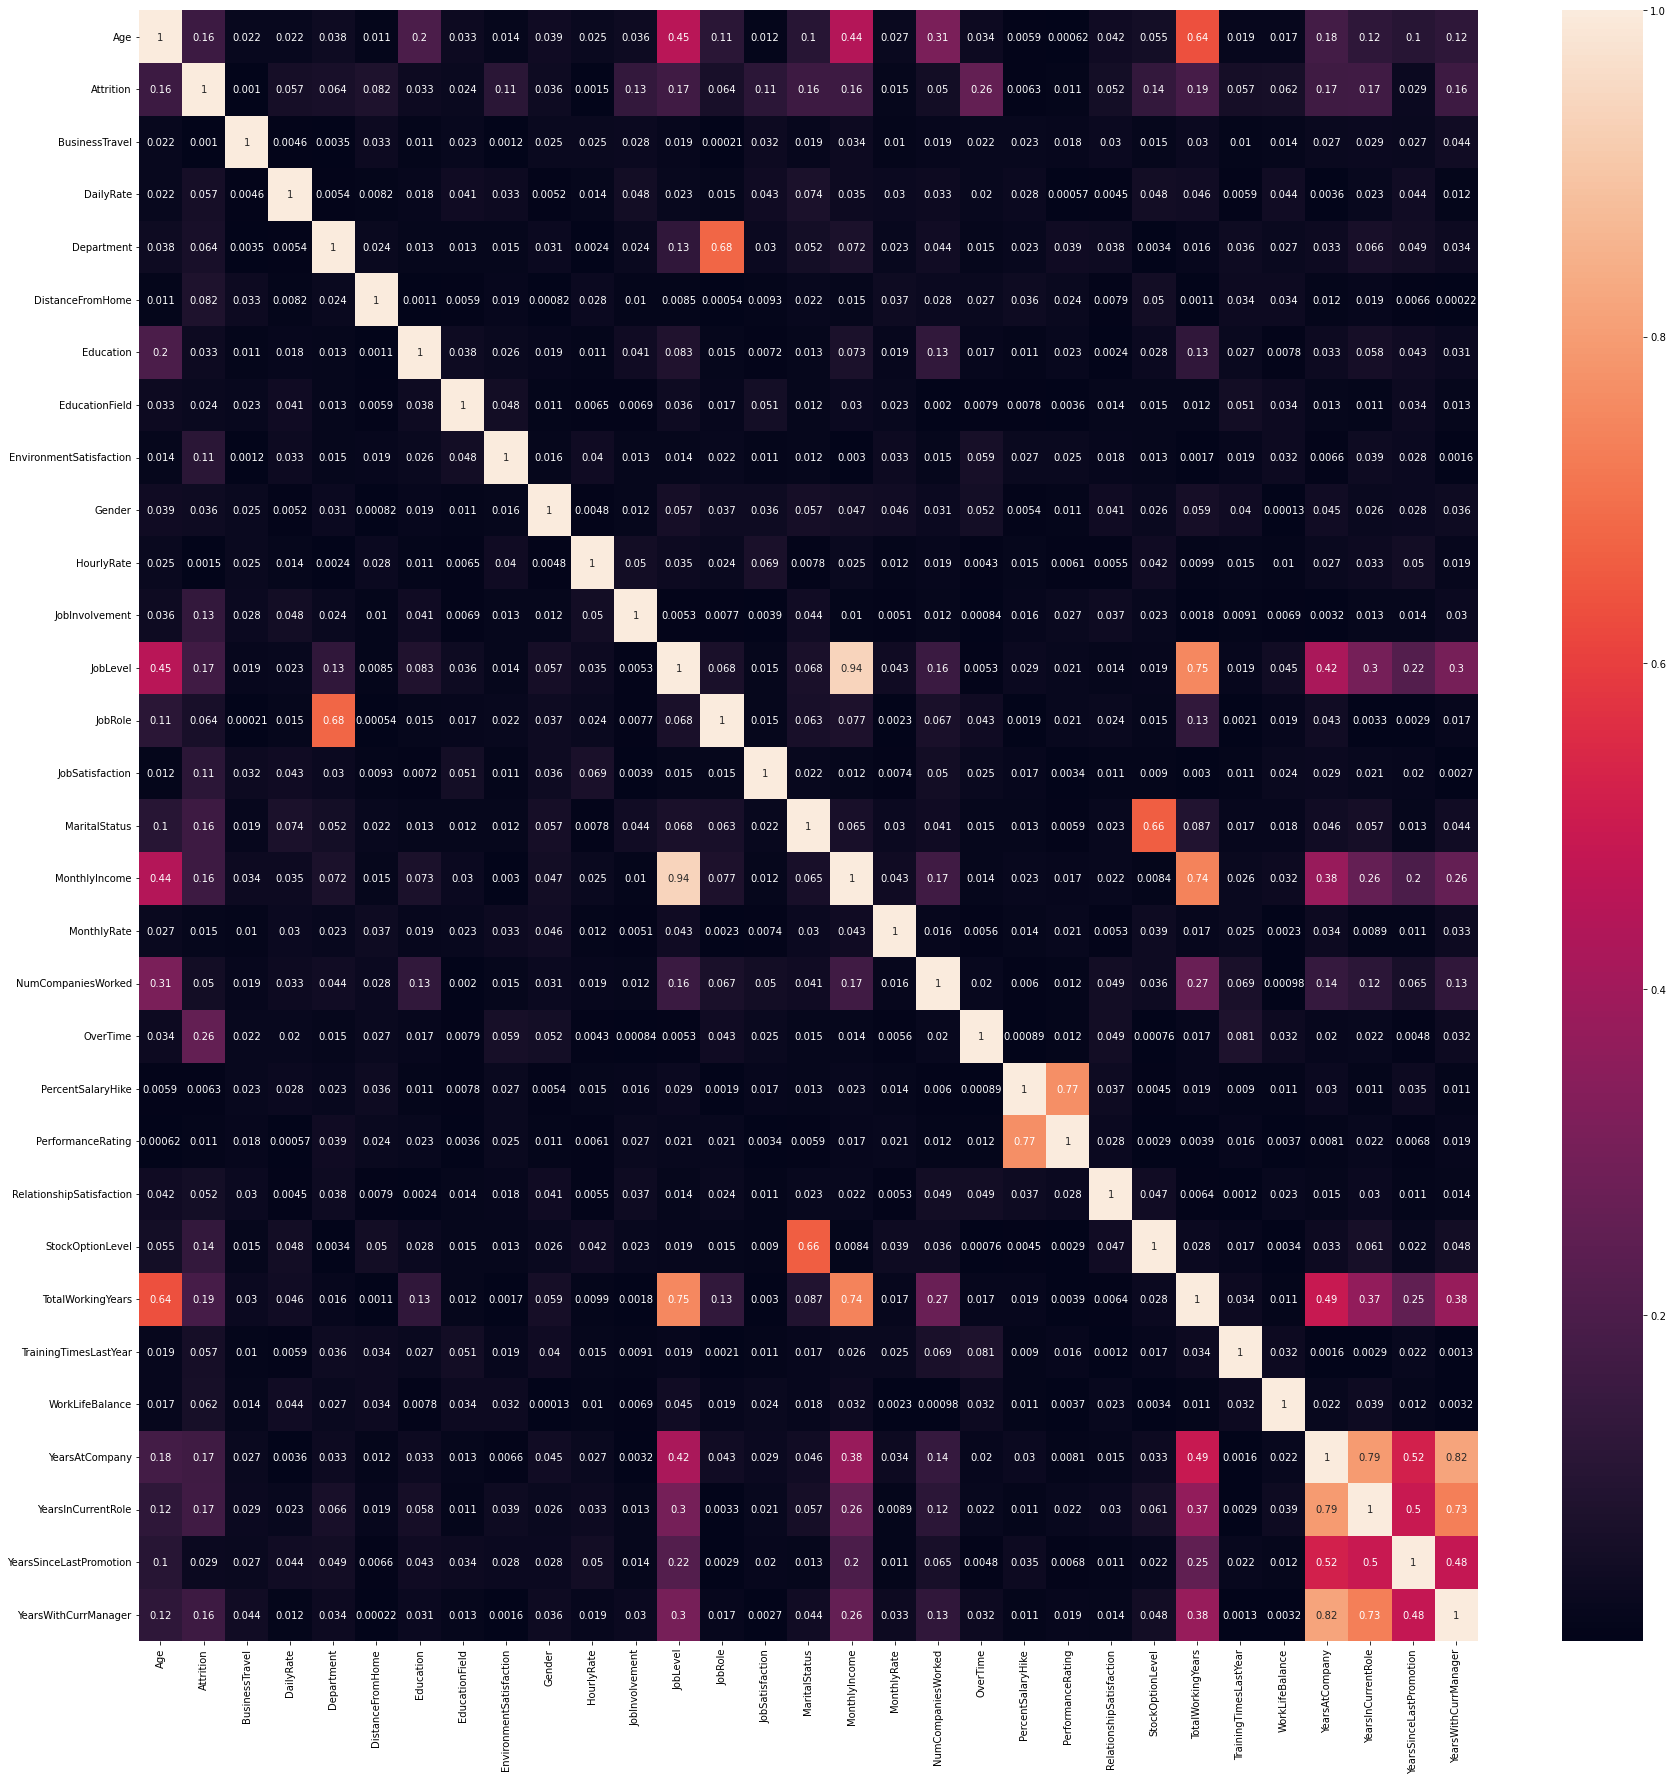

In [110]:
plt.figure(figsize=(30,30))
sns.heatmap(cor,annot=True)
plt.show()

1] MOnthlyIncome has high correlation of 0.94 with JobLevel

2] YearsAtCompany has strong correlation 0.82 with YearWithCurrManager.

3] Performance rating has crrelation 0.77 with PercentSalaryHike.

4] TotalWorkingYears has high correlation 0.75 with JobLevel 

5] TotalWorkingYears has high correlation 0.74 with MonthlyIncome.

6] YearsInCurrentRole has strong correlation 0.73 with YearWithCurrManager.

7] Jobrole has moderate correlation of 0.68 with Department.

8] StockOptionLevel has correlation 0.66 with MaritalStatus.

9] TotalWorkingYears has moderate correlation 0.64 with Age 

10] YearsAtCompany has strong correlation 0.52 with YearSinLastPromotion. 




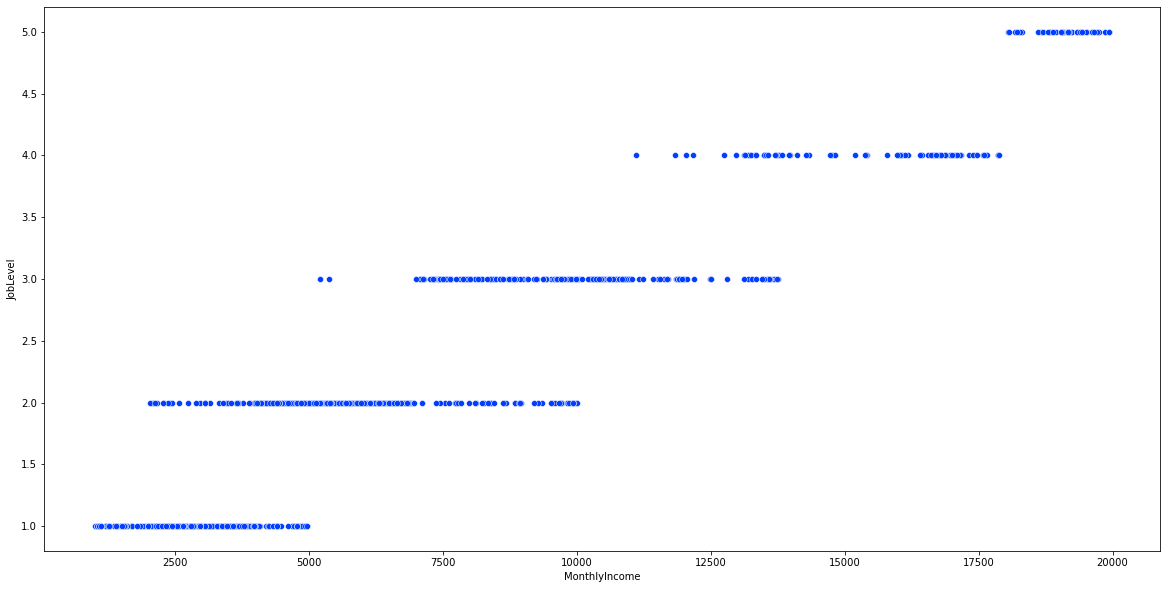

In [111]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df["MonthlyIncome"],y=df["JobLevel"])
plt.show()

1] Level increase which will increase in Monthly income of employee in direct proportion.

* Analsis of YearsAtCompany with YearsWithCurrManager.

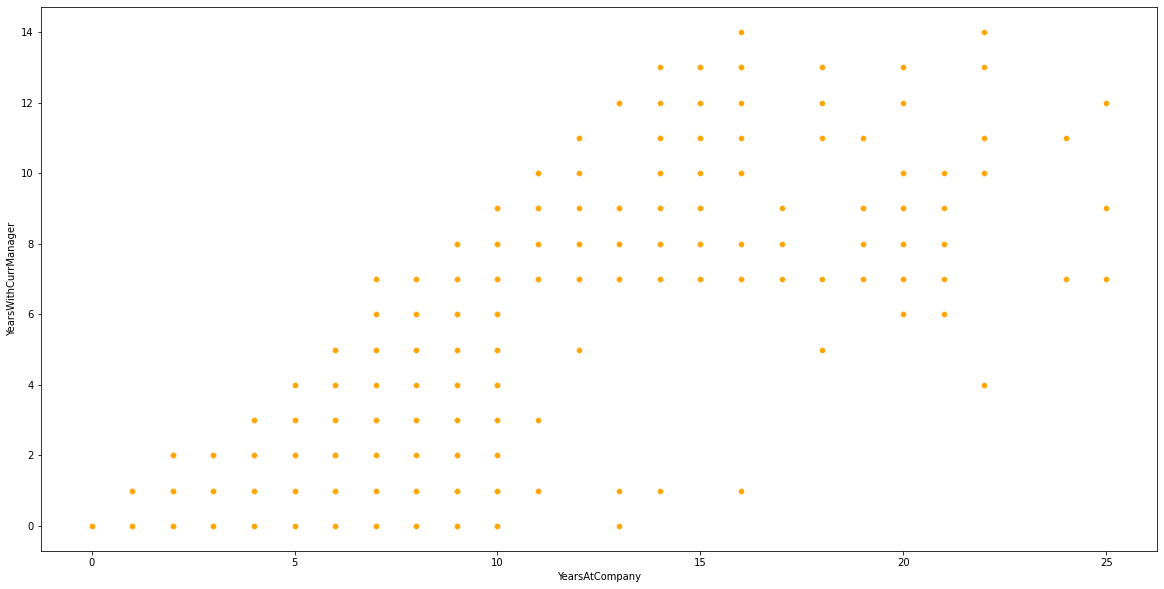

In [112]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df["YearsAtCompany"],y=df["YearsWithCurrManager"],color='orange')
plt.show()

1] Manager and employee has strong relation can be observe from this graph.

2] change in Manager person can affect on resignation of employees,which can be increase. 

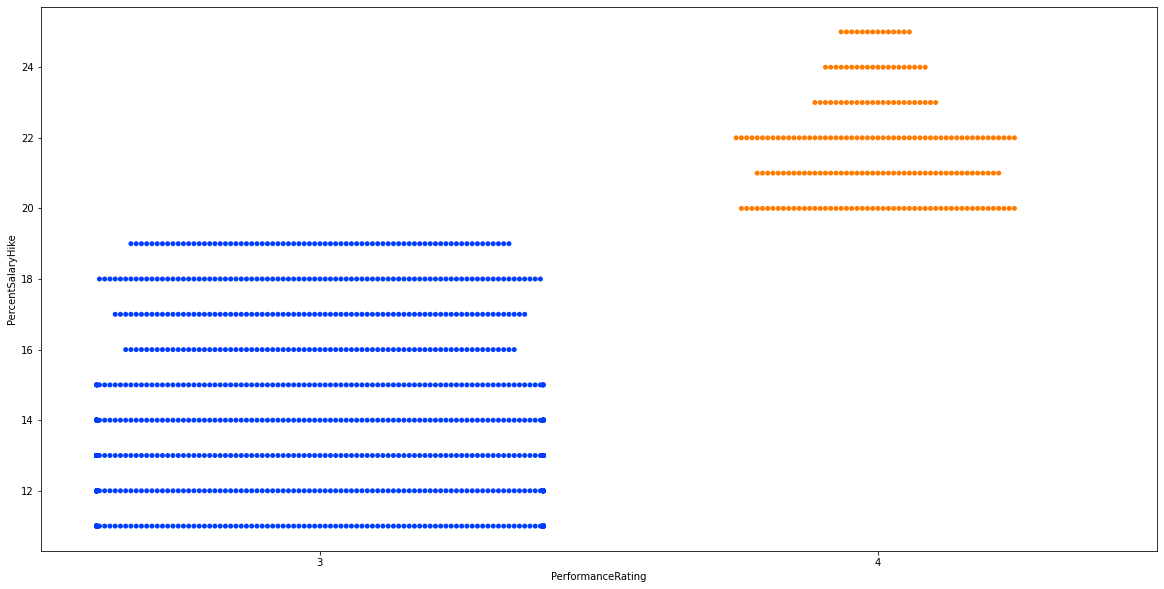

In [113]:
plt.figure(figsize=(20,10))
sns.swarmplot(x=df["PerformanceRating"],y=df["PercentSalaryHike"])
plt.show()

1] For 4 performancerating Percentage of salary hike is 20 to 25 %

3] for 3 PerformanceRating salary hike is upto 19 percent only

* Analysing relation of TotalWorkingYears with JobLevel.

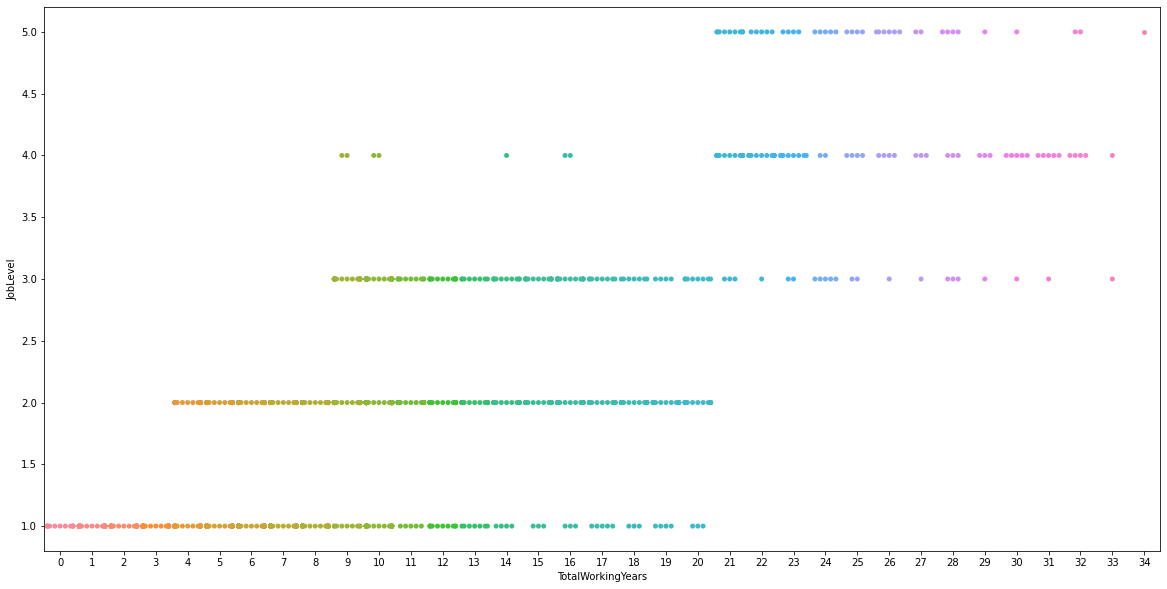

In [114]:
plt.figure(figsize=(20,10))
sns.swarmplot(x=df["TotalWorkingYears"],y=df["JobLevel"])
plt.show()

1] TotalworkingYears increases JobLevel increases in direct proportion.

* Analysing relation of TotalWorkingYears with MonthlyIncome.

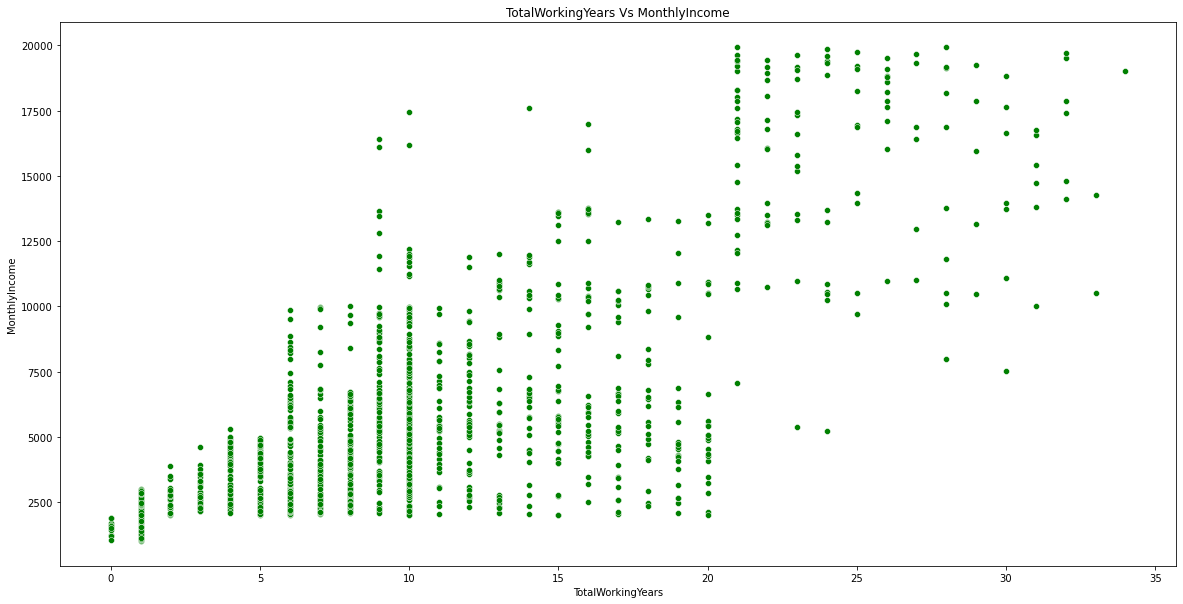

In [115]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df["TotalWorkingYears"],y=df["MonthlyIncome"],color='green')
plt.title("TotalWorkingYears Vs MonthlyIncome")
plt.show()

* There is positive relationship between TotalWorkingYears and MonthlyIncome.

1] TotalWorkingYears increases MonthlyIncome also Increase, can be observe in bottom right corner of graph

2] TotalWorkingYears decreases MonthlyIncome also decreases, can be observe in Top left corner of graph.

* Analysing relation of YearsInCurrentRole with YearsWithCurrManager

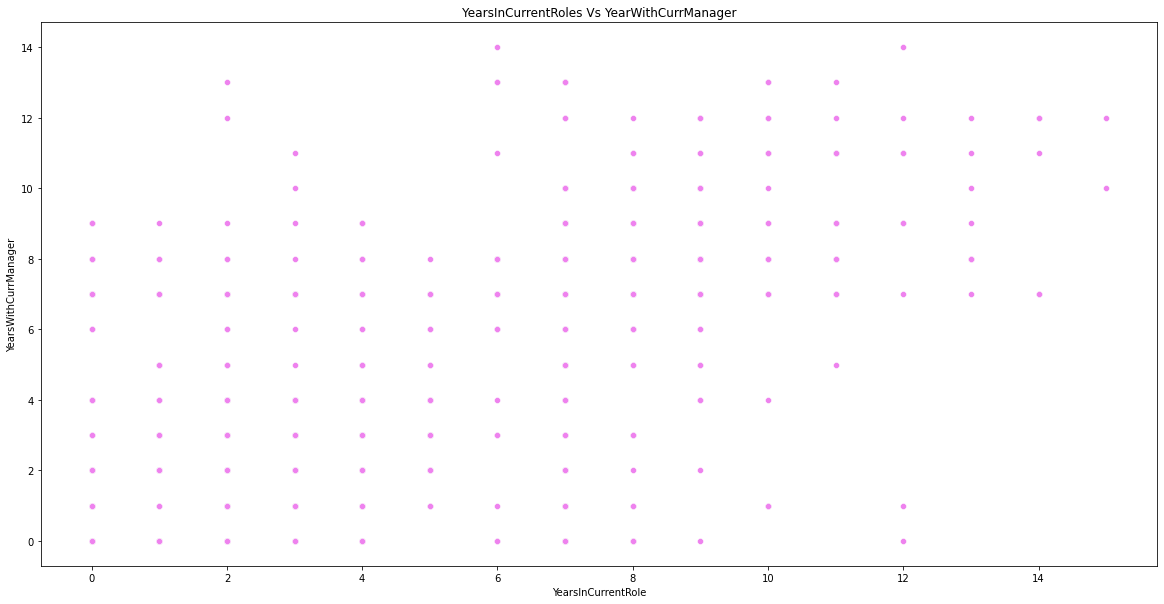

In [116]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df["YearsInCurrentRole"],y=df["YearsWithCurrManager"],color='violet')
plt.title("YearsInCurrentRoles Vs YearWithCurrManager")
plt.show()

* There is positive relationship between YearsInCurrentRole and YearsWithCurrManager.

1] YearsInCurrentRole increases YearsWithCurrManager also Increase.  can be observe in bottom right corner of graph

2] YearsInCurrentRole decreases YearsWithCurrManager also decreases.  can be observe in Top left corner of graph.

* Analysing relation of JobRole with Department.

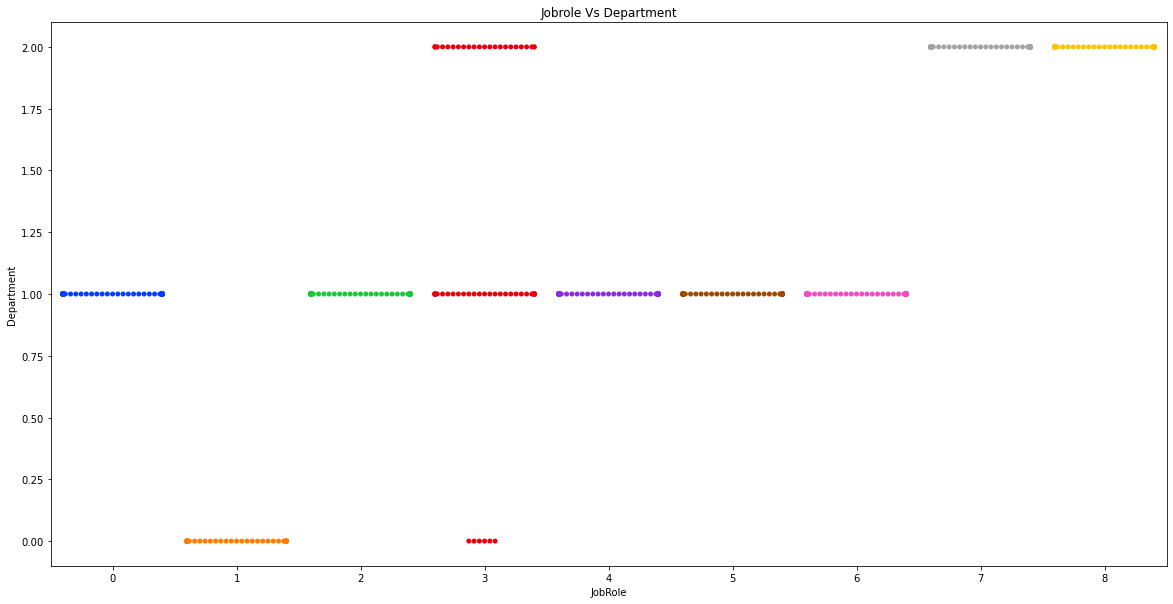

In [117]:
plt.figure(figsize=(20,10))
sns.swarmplot(x=df["JobRole"],y=df["Department"])
plt.title("Jobrole Vs Department")
plt.show()

1] Each department has its own Jobrole depending upon responsibilties , This is Department specific hence it is reflecting as relationship

* Analysing relation of StockOptionLevel with MaritalStatus

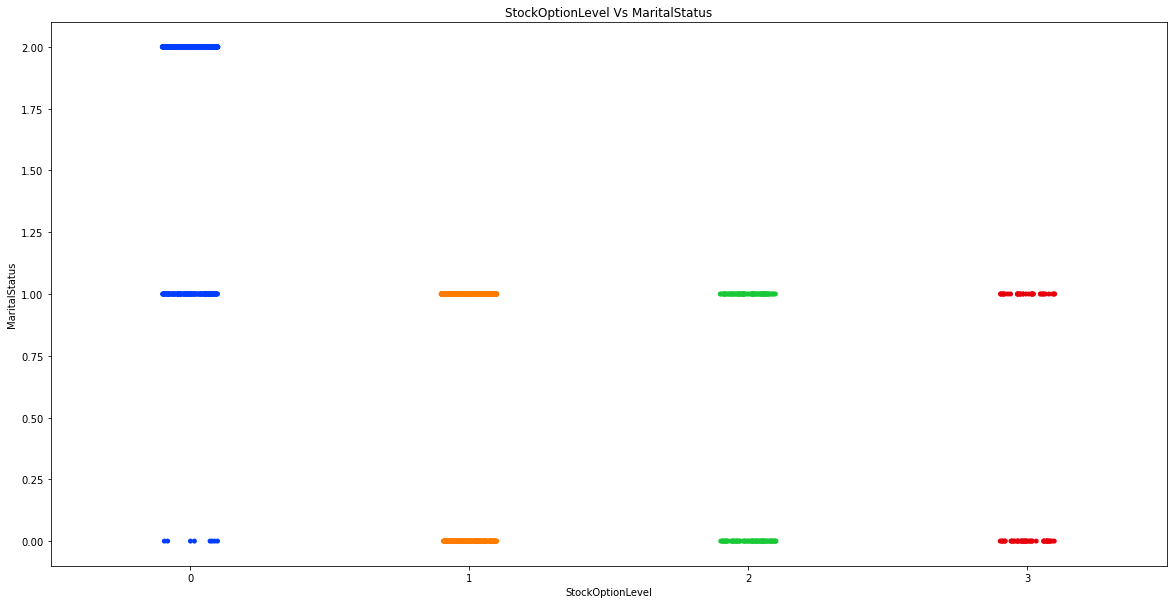

In [118]:
plt.figure(figsize=(20,10))
sns.stripplot(x=df["StockOptionLevel"],y=df["MaritalStatus"])
plt.title("StockOptionLevel Vs MaritalStatus")
plt.show()

1] Single Marital status have stockOptionLevel 0 only.

2] Married status are less in Level 0.

* Analysing TotalWorkingYears with Age

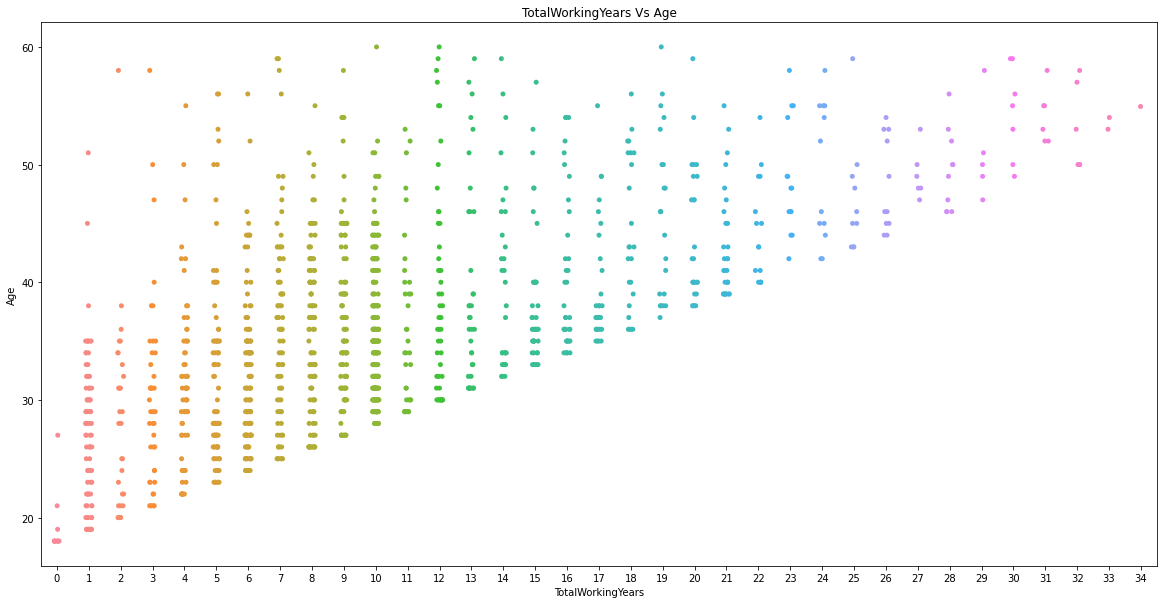

In [119]:
plt.figure(figsize=(20,10))
sns.stripplot(x=df["TotalWorkingYears"],y=df["Age"])
plt.title("TotalWorkingYears Vs Age")
plt.show()

1] There is positive relationship between Age and TotalWorkingYears.
     
    a) As TotalWorkingYears increses Age increases but Its not applicable for Vice Versa

* Analysis of Correlation of All features with label.

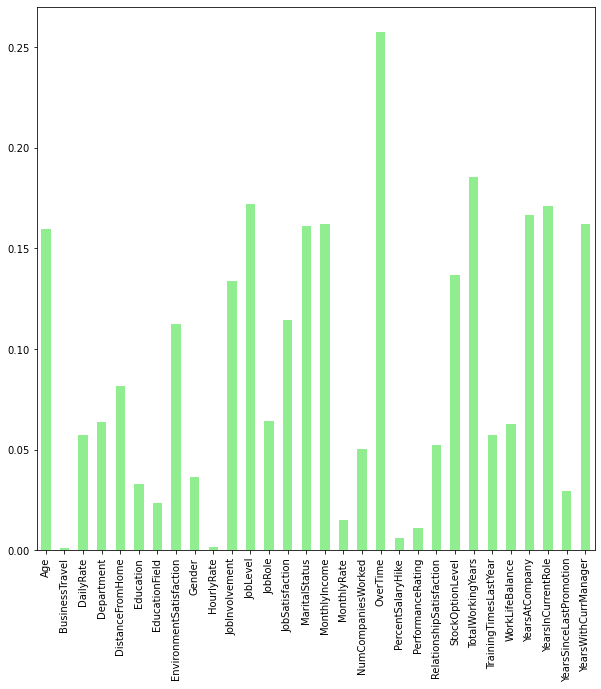

In [120]:
plt.figure(figsize=(10,10))
cor_target=df[features].corrwith(data['Attrition']).abs()
cor_target.plot(kind="bar",color='lightgreen')
plt.show()

1] All features have low correlation with label Attrition 

2] Features like BussinessTravel,HourlyRate,PercentSalaryHike have very low correlation.

3]Age JobLevel,MariatlStatus,MonthlyIncome,Overtime ,TotalWorkingYears and YearsINCurrentRole have correlation above 0.15 and below 0.25

* To overcome this low correlation with target, PCA can be Useful.

* Analyse Multicollinearity with Variance Inflation Factor

In [121]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor

Predictors1=df.drop(columns=['Attrition'],axis=1)
predictor1=Predictors1.to_numpy()

In [122]:
VIF1=pd.DataFrame()
VIF1["Features"]=Predictors1.columns
VIF1["vif_scores"]=[variance_inflation_factor(predictor1,i) for i in range(Predictors1.shape[1])]
VIF1

,Features,vif_scores
0,Age,30.937930
1,BusinessTravel,6.667388
2,DailyRate,5.041042
3,Department,13.849252
4,DistanceFromHome,2.320873
5,Education,9.339536
6,EducationField,3.889948
7,EnvironmentSatisfaction,7.188979
8,Gender,2.531225
9,HourlyRate,11.302474


* Analyse vif score after eliminating PerformanceRating

In [123]:
Predictors2=df.drop(columns=['Attrition','PerformanceRating'],axis=1)
predictor2=Predictors2.to_numpy()
VIF2=pd.DataFrame()
VIF2["Features"]=Predictors2.columns
VIF2["vif_scores"]=[variance_inflation_factor(predictor2,i) for i in range(Predictors2.shape[1])]
VIF2

,Features,vif_scores
0,Age,30.106586
1,BusinessTravel,6.549156
2,DailyRate,5.016365
3,Department,13.829806
4,DistanceFromHome,2.316330
5,Education,9.262825
6,EducationField,3.860926
7,EnvironmentSatisfaction,7.088818
8,Gender,2.519747
9,HourlyRate,10.952634


* Analyse vif score after removal of JobLevel

In [124]:
Predictors3=df.drop(columns=['Attrition','PerformanceRating','JobLevel'],axis=1)
predictor3=Predictors3.to_numpy()
VIF3=pd.DataFrame()
VIF3["Features"]=Predictors3.columns
VIF3["vif_scores"]=[variance_inflation_factor(predictor3,i) for i in range(Predictors3.shape[1])]
VIF3

,Features,vif_scores
0,Age,30.024148
1,BusinessTravel,6.548392
2,DailyRate,5.014605
3,Department,12.960650
4,DistanceFromHome,2.305744
5,Education,9.250799
6,EducationField,3.859693
7,EnvironmentSatisfaction,7.064203
8,Gender,2.519183
9,HourlyRate,10.948166


* Analyse after removal of Age feature having vif score 30.02

In [125]:
Predictors4=df.drop(columns=['Attrition','PerformanceRating','JobLevel','Age'],axis=1)
predictor4=Predictors4.to_numpy()
VIF4=pd.DataFrame()
VIF4["Features"]=Predictors4.columns
VIF4["vif_scores"]=[variance_inflation_factor(predictor4,i) for i in range(Predictors4.shape[1])]
VIF4

,Features,vif_scores
0,BusinessTravel,6.517981
1,DailyRate,5.011444
2,Department,12.940878
3,DistanceFromHome,2.305420
4,Education,8.849522
5,EducationField,3.858955
6,EnvironmentSatisfaction,7.000784
7,Gender,2.515814
8,HourlyRate,10.779752
9,JobInvolvement,14.553869


* Analyse with removal of PercentSalaryHike

In [126]:
Predictors5=df.drop(columns=['Attrition','PerformanceRating','JobLevel','Age',"PercentSalaryHike"],axis=1)
predictor5=Predictors5.to_numpy()
VIF5=pd.DataFrame()
VIF5["Features"]=Predictors5.columns
VIF5["vif_scores"]=[variance_inflation_factor(predictor5,i) for i in range(Predictors5.shape[1])]
VIF5

,Features,vif_scores
0,BusinessTravel,6.479884
1,DailyRate,4.961941
2,Department,12.938621
3,DistanceFromHome,2.290937
4,Education,8.771449
5,EducationField,3.848946
6,EnvironmentSatisfaction,6.963297
7,Gender,2.504202
8,HourlyRate,10.643943
9,JobInvolvement,14.333934


* Analyse wit removal of WorkLifeBalance having score of 14.44

In [127]:
Predictors6=df.drop(columns=['Attrition','PerformanceRating','JobLevel','Age',"PercentSalaryHike","WorkLifeBalance"],axis=1)
predictor6=Predictors6.to_numpy()
VIF6=pd.DataFrame()
VIF6["Features"]=Predictors6.columns
VIF6["vif_scores"]=[variance_inflation_factor(predictor6,i) for i in range(Predictors6.shape[1])]
VIF6

,Features,vif_scores
0,BusinessTravel,6.443311
1,DailyRate,4.960040
2,Department,12.903529
3,DistanceFromHome,2.290861
4,Education,8.670585
5,EducationField,3.813708
6,EnvironmentSatisfaction,6.847724
7,Gender,2.493878
8,HourlyRate,10.496939
9,JobInvolvement,14.073107


* Analyse with removal of JobInvolvement

In [128]:
Predictors7=df.drop(columns=['Attrition','PerformanceRating','JobLevel','Age',"PercentSalaryHike","WorkLifeBalance",'JobInvolvement'],axis=1)
predictor7=Predictors7.to_numpy()
VIF7=pd.DataFrame()
VIF7["Features"]=Predictors7.columns
VIF7["vif_scores"]=[variance_inflation_factor(predictor7,i) for i in range(Predictors7.shape[1])]
VIF7

,Features,vif_scores
0,BusinessTravel,6.328603
1,DailyRate,4.891378
2,Department,12.903147
3,DistanceFromHome,2.284374
4,Education,8.466458
5,EducationField,3.801126
6,EnvironmentSatisfaction,6.787866
7,Gender,2.479517
8,HourlyRate,10.134499
9,JobRole,8.254803


* Analyse with removal of YearsAtCompany Feature

In [129]:
c=['Attrition','PerformanceRating','JobLevel','Age',"PercentSalaryHike","WorkLifeBalance",'JobInvolvement','YearsAtCompany']
Predictors8=df.drop(columns=c,axis=1)
predictor8=Predictors8.to_numpy()
VIF8=pd.DataFrame()
VIF8["Features"]=Predictors8.columns
VIF8["vif_scores"]=[variance_inflation_factor(predictor8,i) for i in range(Predictors8.shape[1])]
VIF8

,Features,vif_scores
0,BusinessTravel,6.326735
1,DailyRate,4.890977
2,Department,12.902519
3,DistanceFromHome,2.283682
4,Education,8.463134
5,EducationField,3.799796
6,EnvironmentSatisfaction,6.787855
7,Gender,2.479068
8,HourlyRate,10.125432
9,JobRole,8.253990


* Analyse vif scores with removal of Department 

In [130]:
c1=['Attrition','PerformanceRating','JobLevel','Age',"PercentSalaryHike","WorkLifeBalance",'JobInvolvement','YearsAtCompany',"Department"]
Predictors9=df.drop(columns=c1,axis=1)
predictor9=Predictors9.to_numpy()
VIF9=pd.DataFrame()
VIF9["Features"]=Predictors9.columns
VIF9["vif_scores"]=[variance_inflation_factor(predictor9,i) for i in range(Predictors9.shape[1])]
VIF9

,Features,vif_scores
0,BusinessTravel,6.323253
1,DailyRate,4.887500
2,DistanceFromHome,2.278086
3,Education,8.455502
4,EducationField,3.797014
5,EnvironmentSatisfaction,6.780239
6,Gender,2.477541
7,HourlyRate,10.067325
8,JobRole,4.232782
9,JobSatisfaction,6.669658


* Analyse vif scores with removal of HourlyRate

In [131]:
c2=['Attrition','PerformanceRating','JobLevel','Age',"PercentSalaryHike","WorkLifeBalance",'JobInvolvement','YearsAtCompany',"Department",'HourlyRate']
Predictors10=df.drop(columns=c2,axis=1)
predictor10=Predictors10.to_numpy()
VIF10=pd.DataFrame()
VIF10["Features"]=Predictors10.columns
VIF10["vif_scores"]=[variance_inflation_factor(predictor10,i) for i in range(Predictors10.shape[1])]
VIF10

,Features,vif_scores
0,BusinessTravel,6.189851
1,DailyRate,4.833672
2,DistanceFromHome,2.263924
3,Education,8.284805
4,EducationField,3.780756
5,EnvironmentSatisfaction,6.741634
6,Gender,2.460626
7,JobRole,4.216122
8,JobSatisfaction,6.652447
9,MaritalStatus,5.338541


* NOw Multicollinearity is removed succesfully.i.e below 10 
1] lets Analyse the variables which have removed how they impact on label.

2] PerformanceRating,JobLevel,Age,PercentSalaryHike,WorkLifeBalance,JobInvolvement,YearsAtCompany,Department,HourlyRate these   features will have to remove to overcome multicollinearity.

3] Age JobLevel,MariatlStatus,MonthlyIncome,Overtime ,TotalWorkingYears and YearsINCurrentRole have correlation above 0.15 and  below 0.25

In [132]:
df[c2].corrwith(df["Attrition"])

Attrition            1.000000
PerformanceRating    0.010781
JobLevel            -0.171968
Age                 -0.159366
PercentSalaryHike   -0.006267
WorkLifeBalance     -0.062492
JobInvolvement      -0.133957
YearsAtCompany      -0.166455
Department           0.063637
HourlyRate          -0.001532
dtype: float64

Joblevel Age JobInvolvement , YearsAtCompany have high correlation among all features we cannot remove this features as they are contributing in prediction of label

* skewness before transformation

In [133]:
df[cont].skew()

Age                        0.472280
DailyRate                 -0.017078
DistanceFromHome           0.954752
HourlyRate                -0.030481
MonthlyIncome              1.544770
MonthlyRate                0.030596
TotalWorkingYears          1.034487
YearsAtCompany             1.248623
YearsInCurrentRole         0.726675
YearsSinceLastPromotion    1.756335
YearsWithCurrManager       0.694506
dtype: float64

<AxesSubplot:>

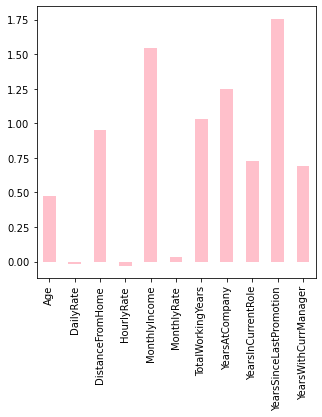

In [134]:
df[cont].skew().plot.bar(figsize=(5,5),color='pink')

* Analyse fro transformation to handle skewness

* PowerTransformation

In [135]:
from sklearn.preprocessing import PowerTransformer

In [136]:
data=df.copy()

In [137]:
transform1=pd.DataFrame()
pwr1=PowerTransformer(method='yeo-johnson')
transform1[cont]=pwr1.fit_transform(data[cont])
transform1[cont].skew()

Age                       -0.004079
DailyRate                 -0.199742
DistanceFromHome          -0.008149
HourlyRate                -0.105678
MonthlyIncome              0.027700
MonthlyRate               -0.176560
TotalWorkingYears         -0.009666
YearsAtCompany            -0.025230
YearsInCurrentRole        -0.069631
YearsSinceLastPromotion    0.212301
YearsWithCurrManager      -0.070570
dtype: float64

* Sqaure root transformation

In [138]:
transform2=pd.DataFrame()
transform2=np.sqrt(data[cont])
transform2.skew()


Age                        0.186057
DailyRate                 -0.420782
DistanceFromHome           0.394018
HourlyRate                -0.235091
MonthlyIncome              0.950248
MonthlyRate               -0.340256
TotalWorkingYears          0.042345
YearsAtCompany             0.075280
YearsInCurrentRole        -0.318539
YearsSinceLastPromotion    0.629674
YearsWithCurrManager      -0.287532
dtype: float64

* Cuberoot transformation

In [139]:
transform3=pd.DataFrame()
transform3=np.cbrt(data[cont])
transform3.skew()

Age                        0.086271
DailyRate                 -0.581497
DistanceFromHome           0.183373
HourlyRate                -0.306806
MonthlyIncome              0.742985
MonthlyRate               -0.483578
TotalWorkingYears         -0.563399
YearsAtCompany            -0.700051
YearsInCurrentRole        -0.884938
YearsSinceLastPromotion    0.157801
YearsWithCurrManager      -0.819914
dtype: float64

* log transformation

In [140]:
transform4=pd.DataFrame()
transform4=np.log(data[cont])
transform4.skew()

Age                       -0.120646
DailyRate                 -0.946540
DistanceFromHome          -0.247769
HourlyRate                -0.455398
MonthlyIncome              0.318593
MonthlyRate               -0.805190
TotalWorkingYears               NaN
YearsAtCompany                  NaN
YearsInCurrentRole              NaN
YearsSinceLastPromotion         NaN
YearsWithCurrManager            NaN
dtype: float64

* OUt of all above transformation Powertransformer works betterr. transform original dataframe with powertransformer

In [141]:
pwr1=PowerTransformer(method='yeo-johnson')
df[cont]=pwr1.fit_transform(df[cont])

* Analyse skewness after transformation.

In [142]:
df[cont].skew().abs()

Age                        0.004079
DailyRate                  0.199742
DistanceFromHome           0.008149
HourlyRate                 0.105678
MonthlyIncome              0.027700
MonthlyRate                0.176560
TotalWorkingYears          0.009666
YearsAtCompany             0.025230
YearsInCurrentRole         0.069631
YearsSinceLastPromotion    0.212301
YearsWithCurrManager       0.070570
dtype: float64

<AxesSubplot:>

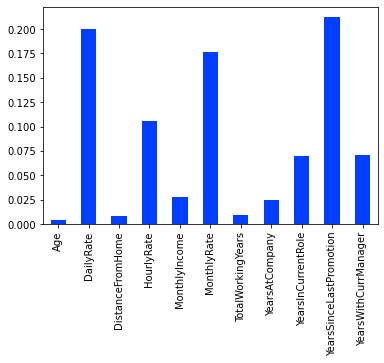

In [143]:
df[cont].skew().abs().plot.bar()

* Skewness has been removed from features can be observed from graph

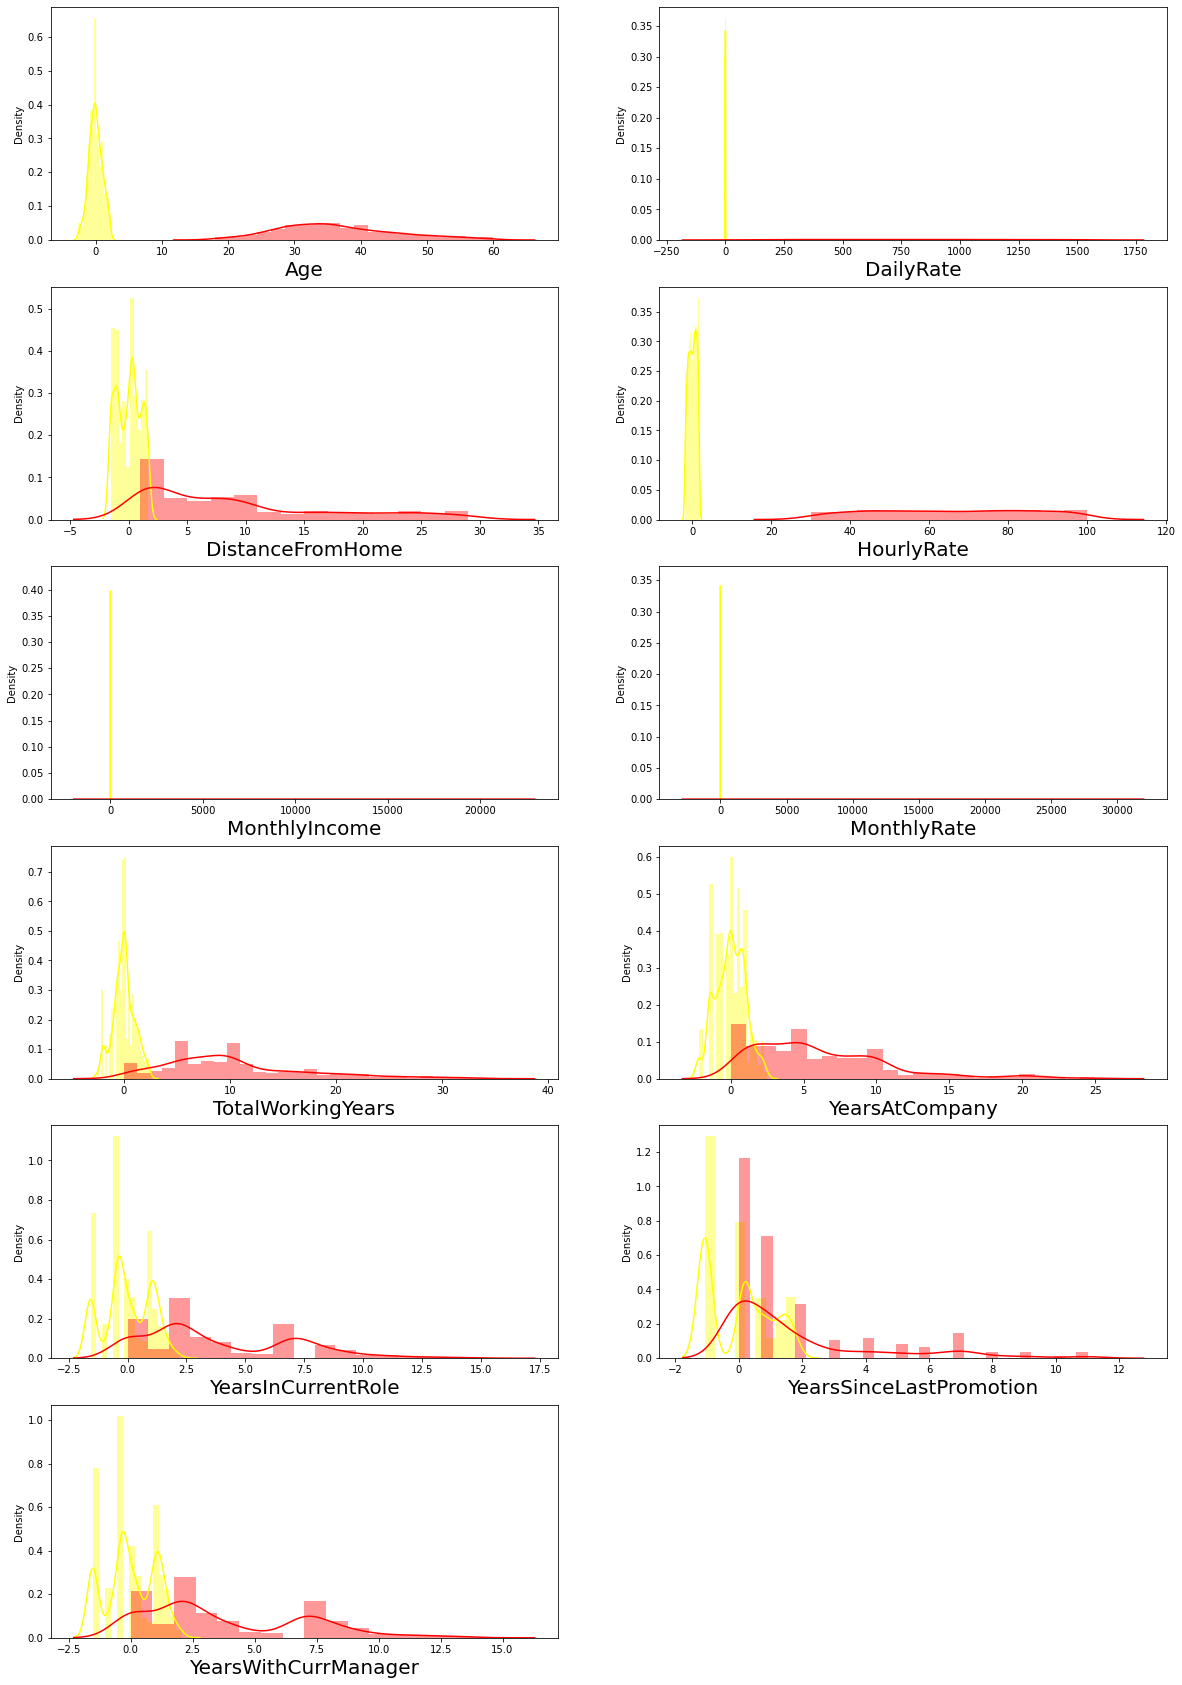

<Figure size 432x288 with 0 Axes>

In [144]:
plt.figure(figsize=(20,30))
sns.set_palette('bright')
graph=1

for column in cont:
    if graph<=len(cont):
        ax=plt.subplot(6,2,graph)
        sns.distplot(df[column],color='yellow') #after
        sns.distplot(data[column],color='red') # before
        plt.xlabel(column,fontsize=20)
        
    graph+=1
plt.show()
plt.tight_layout()

* Above graph is comparison of distribution  before and after transformation

In [145]:
# Split data into Features and Label

x1=df.drop(columns=['Attrition'],axis=1)
y1=df.Attrition

In [146]:
x1.shape

(1387, 30)

In [147]:
y1.shape

(1387,)

* Standardization of features

In [148]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scaled=st.fit_transform(x1)

In [149]:
x_scaled.shape

(1387, 30)

* Features have low correlation with label and there is multicollinearity exist within features which can be removed with 
elimination of 9 features having some amount of correlation with label  among other features.

* This scenario can be handle with PCA.

In [150]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit_transform(x_scaled)

array([[-0.38206681,  0.74133334, -2.08310481, ..., -0.88178048,
         0.13269562,  0.01476991],
       [-1.31284795, -1.07877373,  2.70420466, ..., -0.65660256,
        -0.01116778, -0.10457858],
       [ 3.33139814,  1.86164761, -0.15854633, ...,  0.31241403,
        -0.30123687,  0.44709234],
       ...,
       [ 0.73780203, -0.0486319 ,  2.41964238, ..., -0.28890613,
         0.21202837, -0.36902714],
       [-1.5593117 , -0.35384364, -1.19575103, ...,  0.14774532,
        -0.27459848, -0.00707837],
       [ 0.46725989, -0.04815873, -0.34665954, ..., -0.41149794,
         0.02596126,  0.15861142]])

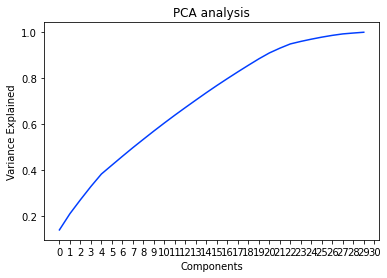

In [151]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components')
plt.ylabel('Variance Explained')
plt.title('PCA analysis')
plt.xticks(range(0,31))
plt.show()

In [152]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))  

0     0.141530
1     0.211980
2     0.272361
3     0.330188
4     0.384254
5     0.422814
6     0.461177
7     0.498807
8     0.535098
9     0.571028
10    0.605949
11    0.639985
12    0.673008
13    0.705472
14    0.737542
15    0.768590
16    0.798584
17    0.827940
18    0.856494
19    0.884404
20    0.910018
21    0.930706
22    0.949232
23    0.960143
24    0.969873
25    0.978713
26    0.986417
27    0.992767
28    0.996572
29    1.000000
dtype: float64

*  From above analysis,24 components of PCA are explaining 96.01 of data variance let use only 24 components.

In [153]:
pca1=PCA(n_components=24)
dim=pca1.fit_transform(x_scaled)
x_dim=pd.DataFrame(dim,columns=[('PC{}').format(i) for i in range(1,25)])
x_dim

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,-0.382067,0.741333,-2.083105,-1.307599,0.039901,-2.630298,-0.750888,0.364737,1.185463,3.043364,...,1.662635,-0.605394,-0.067877,1.600771,-0.379507,0.886175,1.282405,1.392244,-0.559112,0.223694
1,-1.312848,-1.078774,2.704205,-1.633249,0.053337,0.582066,0.609913,-0.821960,1.056359,-2.129537,...,0.088213,-1.625338,-0.017365,0.216577,0.023989,0.293379,0.373698,0.807910,1.598532,0.125289
2,3.331398,1.861648,-0.158546,0.065023,-1.397806,-0.432700,1.214882,0.990857,-2.495315,1.516819,...,0.326016,0.810578,-1.465686,-0.461559,0.495027,-0.103746,1.430884,0.302597,0.157397,0.293286
3,0.374891,-0.906298,-1.040057,0.550389,-0.477399,-1.485387,1.119473,-0.003516,0.215577,-0.399158,...,0.555348,0.279494,-0.205413,-0.143986,-0.511389,-1.376302,0.358447,-0.804810,0.337471,-0.953038
4,1.435704,0.542222,-0.200539,1.380999,-0.976137,1.004590,0.080803,-0.300066,-0.865730,-0.440632,...,-0.858055,-1.287932,1.814335,1.691832,-1.181368,0.957835,2.108623,-0.177458,-1.234049,0.159443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382,0.283585,0.594491,0.845416,0.824901,-0.299101,-0.670782,0.187179,-0.437537,-0.753352,-0.603713,...,0.095708,0.663493,0.907822,0.231081,0.883723,0.878030,0.341514,1.215476,0.324432,0.239564
1383,-1.764858,-0.019874,0.449573,0.969902,-1.081120,2.576924,2.409700,-0.145869,0.735842,0.301853,...,0.347362,-1.048914,0.338954,-0.250415,0.841417,-0.742594,1.056179,0.597928,-0.373667,0.343157
1384,0.737802,-0.048632,2.419642,-1.014935,0.358280,-1.289592,-1.739548,0.866801,0.572694,-0.326813,...,0.827044,0.866390,0.550890,0.889136,1.410093,-0.686527,-0.656676,0.262818,-1.019736,0.036066
1385,-1.559312,-0.353844,-1.195751,-0.607560,0.289965,-0.164892,0.262799,-0.122437,-1.489013,-0.310540,...,0.073000,-1.905069,-0.361974,-0.107684,0.194547,-0.528235,-0.986190,1.753501,1.260586,-0.541474


In [154]:
x_dim.shape

(1387, 24)

In [155]:
y1.shape

(1387,)

* Analyse for Data IMbalance and handle it

In [156]:
y1.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

<AxesSubplot:>

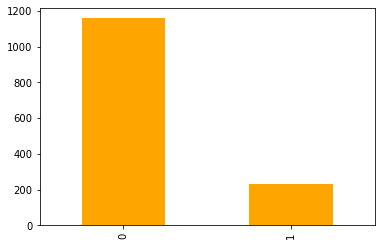

In [157]:
y1.value_counts().plot.bar(color='orange')

* Handaling imbalanced with SMOTE

In [158]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(0.9,k_neighbors=3,random_state=42)


In [159]:
x,y=sm.fit_resample(x_dim,y1)

In [160]:
x.shape

(2200, 24)

In [161]:
y.shape

(2200,)

In [162]:
y.value_counts()

0    1158
1    1042
Name: Attrition, dtype: int64

<AxesSubplot:>

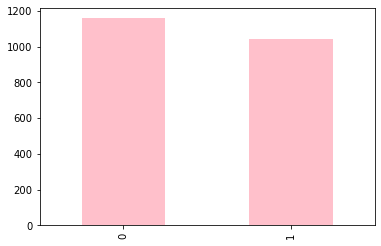

In [163]:
y.value_counts().plot.bar(color="pink")

In [164]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve,plot_roc_curve

* Analysing Best Random State

In [165]:
from sklearn.model_selection import train_test_split


maxac=0
maxRs=0
for i  in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    clf=LogisticRegression()
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print("acuracy score ",acc,'Random sate ',i)
    
    if acc>maxac:
        maxac=acc
        maxRs=i
        print("Accuracy",maxac,"random_state",maxRs)
        
        

acuracy score  0.8022727272727272 Random sate  1
Accuracy 0.8022727272727272 random_state 1
acuracy score  0.8136363636363636 Random sate  2
Accuracy 0.8136363636363636 random_state 2
acuracy score  0.8204545454545454 Random sate  3
Accuracy 0.8204545454545454 random_state 3
acuracy score  0.7931818181818182 Random sate  4
acuracy score  0.7909090909090909 Random sate  5
acuracy score  0.8181818181818182 Random sate  6
acuracy score  0.8386363636363636 Random sate  7
Accuracy 0.8386363636363636 random_state 7
acuracy score  0.7954545454545454 Random sate  8
acuracy score  0.7909090909090909 Random sate  9
acuracy score  0.8159090909090909 Random sate  10
acuracy score  0.8045454545454546 Random sate  11
acuracy score  0.7568181818181818 Random sate  12
acuracy score  0.8022727272727272 Random sate  13
acuracy score  0.775 Random sate  14
acuracy score  0.8363636363636363 Random sate  15
acuracy score  0.7727272727272727 Random sate  16
acuracy score  0.7727272727272727 Random sate  17


In [166]:
print("Maximum accuracy Score is {0} and Random state is {1}".format(maxac,maxRs))

Maximum accuracy Score is 0.8545454545454545 and Random state is 117


* Train Test Split with random state 117 and test size 20%

In [167]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=117)

* Score function

In [168]:
def Cscore(clf,x_trn,y_trn,x_tst,y_tst,train_score=True):
    if train_score:
        ypred_train=clf.predict(x_trn)
        print('******** Train Results***************')
        print("Train Accuracy Score is ",accuracy_score(y_trn,ypred_train))
        print('******************************************************')
        print("Train roc_auc_Score is ",roc_auc_score(y_trn,ypred_train))
        print('-'*50)
        
    elif train_score==False:
        ypred_test=clf.predict(x_tst)
        print('\n******** Test Results***************')
        print("Test Accuracy Score is ", accuracy_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test Precision Score is ", precision_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test f1 Score is ", f1_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test Recall Score is ", recall_score(y_tst,ypred_test))
        print('******************************************************')
        print("Test roc_auc_Score is ",roc_auc_score(y_tst,ypred_test))
        print('-'*50)
        print('\n Classification Report \n ',classification_report(y_tst,ypred_test,digits=3))
        print('-'*50)
        print('\n Confusion Matrix  \n\n',confusion_matrix(y_tst,ypred_test))

* Training algorithms

* Logistic Regression

In [169]:
Lr1=LogisticRegression()
Lr1.fit(x_train,y_train)
Cscore(Lr1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(Lr1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  0.7920454545454545
******************************************************
Train roc_auc_Score is  0.7921809500499228
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8545454545454545
******************************************************
Test Precision Score is  0.864321608040201
******************************************************
Test f1 Score is  0.8431372549019607
******************************************************
Test Recall Score is  0.8229665071770335
******************************************************
Test roc_auc_Score is  0.8530416951469582
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.846     0.883     0.864       231
           1      0.864     0.823     0.843       209

    accuracy                          0.855       440
   macro 

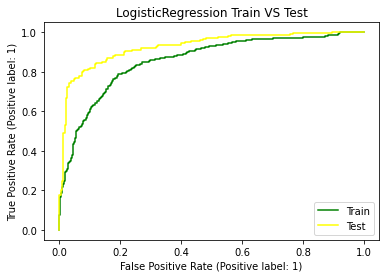

In [170]:
AucPlot1=plot_roc_curve(Lr1,x_train,y_train,color='green')
plot_roc_curve(Lr1,x_test,y_test,ax=AucPlot1.ax_,color='yellow')
plt.title("LogisticRegression Train VS Test")
plt.legend(('Train',"Test"))
plt.show()

* Decision Tree Classifier

In [171]:
dt1=DecisionTreeClassifier(criterion='gini',min_samples_split=2,min_samples_leaf=1,max_depth=None)
dt1.fit(x_train,y_train)
Cscore(dt1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(dt1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8022727272727272
******************************************************
Test Precision Score is  0.7652173913043478
******************************************************
Test f1 Score is  0.8018223234624146
******************************************************
Test Recall Score is  0.8421052631578947
******************************************************
Test roc_auc_Score is  0.8041695146958304
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.843     0.766     0.803       231
           1      0.765     0.842     0.802       209

    accuracy                          0.802       440
   macro avg      0.804     0.804     

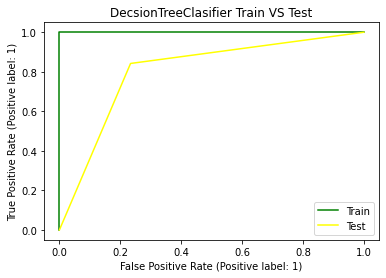

In [172]:
AucPlot2=plot_roc_curve(dt1,x_train,y_train,color='green')
plot_roc_curve(dt1,x_test,y_test,ax=AucPlot2.ax_,color='yellow')
plt.title("DecsionTreeClasifier Train VS Test")
plt.legend(('Train',"Test"))
plt.show()

* KNeighborsClassifier

In [173]:
knn1=KNeighborsClassifier(n_neighbors=5,leaf_size=30,algorithm='auto',weights='distance')
knn1.fit(x_train,y_train)

Cscore(knn1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(knn1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8477272727272728
******************************************************
Test Precision Score is  0.7572463768115942
******************************************************
Test f1 Score is  0.8618556701030928
******************************************************
Test Recall Score is  1.0
******************************************************
Test roc_auc_Score is  0.854978354978355
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      1.000     0.710     0.830       231
           1      0.757     1.000     0.862       209

    accuracy                          0.848       440
   macro avg      0.879     0.855     0.846       440


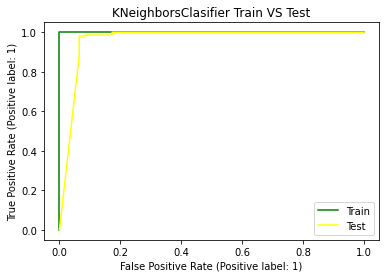

In [174]:
AucPlot3=plot_roc_curve(knn1,x_train,y_train,color='green')
plot_roc_curve(knn1,x_test,y_test,ax=AucPlot3.ax_,color='yellow')
plt.title("KNeighborsClasifier Train VS Test")
plt.legend(('Train',"Test"))
plt.show()

* GradientBoostingClassifier

In [175]:
gbdt1=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,criterion='friedman_mse',min_samples_split=5,min_samples_leaf=1,max_depth=7)
gbdt1.fit(x_train,y_train)

Cscore(gbdt1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(gbdt1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9454545454545454
******************************************************
Test Precision Score is  0.9425837320574163
******************************************************
Test f1 Score is  0.9425837320574163
******************************************************
Test Recall Score is  0.9425837320574163
******************************************************
Test roc_auc_Score is  0.9453178400546821
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.948     0.948     0.948       231
           1      0.943     0.943     0.943       209

    accuracy                          0.945       440
   macro avg      0.945     0.945     

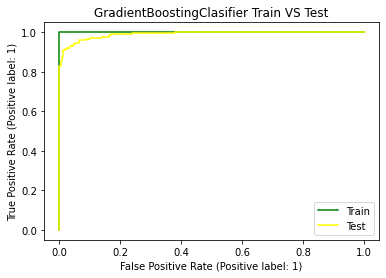

In [176]:
AucPlot4=plot_roc_curve(gbdt1,x_train,y_train,color='green')
plot_roc_curve(gbdt1,x_test,y_test,ax=AucPlot4.ax_,color='yellow')
plt.title("GradientBoostingClasifier Train VS Test")
plt.legend(('Train',"Test"))
plt.show()

* RandomForestClassifier

In [177]:
rf1=RandomForestClassifier(criterion='entropy',max_depth=13,min_samples_split=3,min_samples_leaf=1,bootstrap=True,oob_score=True,n_jobs=None,)
rf1.fit(x_train,y_train)

Cscore(rf1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(rf1,x_train,y_train,x_test,y_test,train_score=False)



******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.95
******************************************************
Test Precision Score is  0.9651741293532339
******************************************************
Test f1 Score is  0.9463414634146342
******************************************************
Test Recall Score is  0.9282296650717703
******************************************************
Test roc_auc_Score is  0.94896331738437
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.937     0.970     0.953       231
           1      0.965     0.928     0.946       209

    accuracy                          0.950       440
   macro avg      0.951     0.949     0.950       440


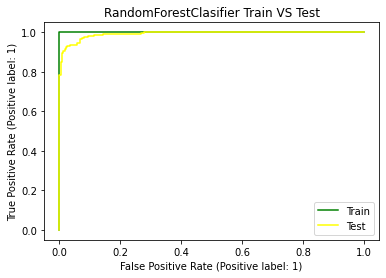

In [178]:
AucPlot5=plot_roc_curve(rf1,x_train,y_train,color='green')
plot_roc_curve(rf1,x_test,y_test,ax=AucPlot5.ax_,color='yellow')
plt.title("RandomForestClasifier Train VS Test")
plt.legend(('Train',"Test"))
plt.show()

* XGBClassifier

In [179]:
xgc1=XGBClassifier(learning_rate=0.1,booster='gbtree',max_depth=7)
xgc1.fit(x_train,y_train)

Cscore(xgc1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(xgc1,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9636363636363636
******************************************************
Test Precision Score is  0.966183574879227
******************************************************
Test f1 Score is  0.9615384615384616
******************************************************
Test Recall Score is  0.9569377990430622
******************************************************
Test roc_auc_Score is  0.963317384370016
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.961     0.970     0.966       231
           1      0.966     0.957     0.962       209

    accuracy                          0.964       440
   macro avg      0.964     0.963     0.

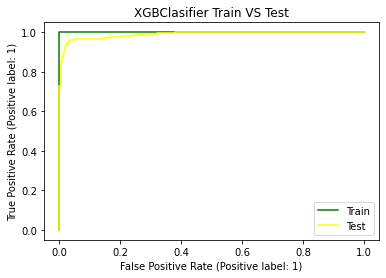

In [180]:
AucPlot6=plot_roc_curve(xgc1,x_train,y_train,color='green')
plot_roc_curve(xgc1,x_test,y_test,ax=AucPlot6.ax_,color='yellow')
plt.title("XGBClasifier Train VS Test")
plt.legend(('Train',"Test"))
plt.show()

* AdabosstClassifier

In [181]:
ada1=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,learning_rate=0.001)
ada1.fit(x_train,y_train)

Cscore(ada1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(ada1,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8227272727272728
******************************************************
Test Precision Score is  0.7911111111111111
******************************************************
Test f1 Score is  0.8202764976958525
******************************************************
Test Recall Score is  0.8516746411483254
******************************************************
Test roc_auc_Score is  0.8241057188425609
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.856     0.797     0.825       231
           1      0.791     0.852     0.820       209

    accuracy                          0.823       440
   macro avg      0.823     0.824     

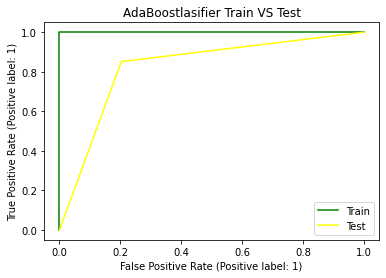

In [182]:
AucPlot7=plot_roc_curve(ada1,x_train,y_train,color='green')
plot_roc_curve(ada1,x_test,y_test,ax=AucPlot7.ax_,color='yellow')
plt.title("AdaBoostlasifier Train VS Test")
plt.legend(('Train',"Test"))
plt.show()

* Finding best cv param for performing and obtaining most generalized cross validation score

In [183]:
from sklearn.model_selection import cross_val_score


for i in [3,5,7,8,9,10]:
    cv=cross_val_score(LogisticRegression(),x,y,cv=i,scoring='accuracy')
    print("Accuracy score is {0} for cv={1}".format(cv.mean(),i))

Accuracy score is 0.7995459913039492 for cv=3
Accuracy score is 0.8013636363636364 for cv=5
Accuracy score is 0.7968326183976775 for cv=7
Accuracy score is 0.8022727272727272 for cv=8
Accuracy score is 0.8000055760008922 for cv=9
Accuracy score is 0.8004545454545454 for cv=10


* Table for analysis of scores

In [184]:
classifiers =[Lr1,knn1,gbdt1,dt1,rf1,xgc1,ada1]
name=['LogisticRegression','KNeighborsClassifier','GradientBoostClassifier',
      'DecisionTreeClassifier','RandomForestClassifier','XGBoostClassifier','AdaBoostClassifier']

In [185]:
test_score=[]
ra_score=[]
train_score=[]
for i in classifiers:
    ypred_test=i.predict(x_test)
    ypred_train=i.predict(x_train)
    test_score.append(accuracy_score(y_test,ypred_test))
    ra_score.append(roc_auc_score(y_test,ypred_test))
    train_score.append(accuracy_score(y_train,ypred_train))

* Cross Validation 

In [186]:
cv_scores_mean=[]
cv_scores=[]
for clf in classifiers:
    scr=cross_val_score(clf,x,y,cv=7,scoring="accuracy")
    cv_scores.append(scr)   
    cv_scores_mean.append(scr.mean())
cv_scores_mean   

[0.7968326183976775,
 0.8363649493767784,
 0.9381920071637996,
 0.8145485795167324,
 0.9372965322009909,
 0.9222886606872047,
 0.8136458829816429]

In [187]:
Eval_clf=pd.DataFrame({'Classifier':name,'Train Accuracy Score':train_score,'Test Accuracy Score':test_score,
                      'ROC_AUC_Score':ra_score,'Validation Score':cv_scores_mean})
Eval_clf

,Classifier,Train Accuracy Score,Test Accuracy Score,ROC_AUC_Score,Validation Score
0,LogisticRegression,0.792045,0.854545,0.853042,0.796833
1,KNeighborsClassifier,1.000000,0.847727,0.854978,0.836365
2,GradientBoostClassifier,1.000000,0.945455,0.945318,0.938192
3,DecisionTreeClassifier,1.000000,0.802273,0.804170,0.814549
4,RandomForestClassifier,1.000000,0.950000,0.948963,0.937297
5,XGBoostClassifier,1.000000,0.963636,0.963317,0.922289
6,AdaBoostClassifier,1.000000,0.822727,0.824106,0.813646


In [188]:
Eval_clf["criteria of selecting best model"]=Eval_clf['Test Accuracy Score']-Eval_clf['Validation Score']
Eval_clf

,Classifier,Train Accuracy Score,Test Accuracy Score,ROC_AUC_Score,Validation Score,criteria of selecting best model
0,LogisticRegression,0.792045,0.854545,0.853042,0.796833,0.057713
1,KNeighborsClassifier,1.000000,0.847727,0.854978,0.836365,0.011362
2,GradientBoostClassifier,1.000000,0.945455,0.945318,0.938192,0.007263
3,DecisionTreeClassifier,1.000000,0.802273,0.804170,0.814549,-0.012276
4,RandomForestClassifier,1.000000,0.950000,0.948963,0.937297,0.012703
5,XGBoostClassifier,1.000000,0.963636,0.963317,0.922289,0.041348
6,AdaBoostClassifier,1.000000,0.822727,0.824106,0.813646,0.009081


In [189]:
Eval_clf.sort_values(by="criteria of selecting best model",ascending=True)

,Classifier,Train Accuracy Score,Test Accuracy Score,ROC_AUC_Score,Validation Score,criteria of selecting best model
3,DecisionTreeClassifier,1.000000,0.802273,0.804170,0.814549,-0.012276
2,GradientBoostClassifier,1.000000,0.945455,0.945318,0.938192,0.007263
6,AdaBoostClassifier,1.000000,0.822727,0.824106,0.813646,0.009081
1,KNeighborsClassifier,1.000000,0.847727,0.854978,0.836365,0.011362
4,RandomForestClassifier,1.000000,0.950000,0.948963,0.937297,0.012703
5,XGBoostClassifier,1.000000,0.963636,0.963317,0.922289,0.041348
0,LogisticRegression,0.792045,0.854545,0.853042,0.796833,0.057713


* AUC plot for Train Data

In [190]:
def TrainAUCplot(clf_list,x_train,y_train):
    
    plt.figure(figsize=(20,20))
    fig=plot_roc_curve(clf_list[0],x_train,y_train)
    for i in clf_list[1:]:
        plot_roc_curve(i,x_train,y_train,ax=fig.ax_)
    plt.legend(prop={'size':11},loc='lower right')
    plt.title("AUC ROC CURVE for Train data")
    plt.show()

<Figure size 1440x1440 with 0 Axes>

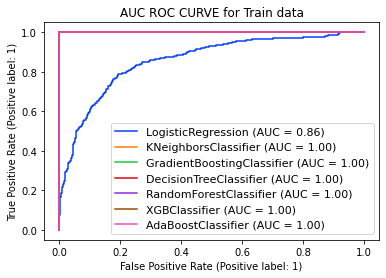

In [191]:
TrainAUCplot(classifiers,x_train,y_train)

1] Except Logistic Regression all classifier perform best on train data

* AUC for Test Data

In [192]:
def TestAUCplot(clf_list,x_test,y_test):
    
    plt.figure(figsize=(20,20))
    fig=plot_roc_curve(clf_list[0],x_test,y_test)
    for i in clf_list[1:]:
        plot_roc_curve(i,x_test,y_test,ax=fig.ax_)
    plt.legend(prop={'size':11},loc='lower right')
    plt.title("AUC ROC CURVE for Test data")
    plt.show()

<Figure size 1440x1440 with 0 Axes>

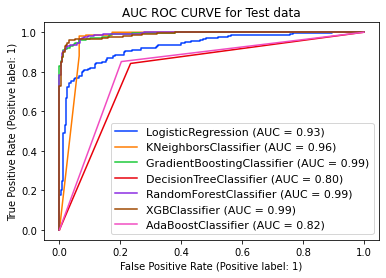

In [193]:
TestAUCplot(classifiers,x_test,y_test)

1] Althogh AdaBosstClassifeir has less deviation with validation score but have very less auc

2] Decisiontreeclassifier has also very low auc

3] we will perform hyperparameter tunning on RandomForest and GradientBoostingClassifier having best train score test score and 
   least deviation in test and validation score and best auc and most important no overfitting. 
   
4] Also kNeighbors have less deviation with validation score .i.e. no overfitting issue   

In [194]:
from sklearn.model_selection import GridSearchCV

* Hyperparametrtuning with KneighborsClassifier

In [195]:
param2={'n_neighbors':[3,5,7,9,11,13,15],'metric':["minkowski",'cosine'],'leaf_size':[20,30,40,50],
        'weights':['uniform','distance'],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],'p':[1,2]}

grid2=GridSearchCV(KNeighborsClassifier(),param_grid=param2,cv=5).fit(x_train,y_train) 
print(grid2.best_params_)
     


{'algorithm': 'auto', 'leaf_size': 20, 'metric': 'cosine', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [196]:
knn2=grid2.best_estimator_
knn2.fit(x_train,y_train)

Cscore(knn2,x_train,y_train,x_test,y_test,train_score=True)
Cscore(knn2,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.8704545454545455
******************************************************
Test Precision Score is  0.7857142857142857
******************************************************
Test f1 Score is  0.88
******************************************************
Test Recall Score is  1.0
******************************************************
Test roc_auc_Score is  0.8766233766233766
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      1.000     0.753     0.859       231
           1      0.786     1.000     0.880       209

    accuracy                          0.870       440
   macro avg      0.893     0.877     0.870       440
weighted avg 

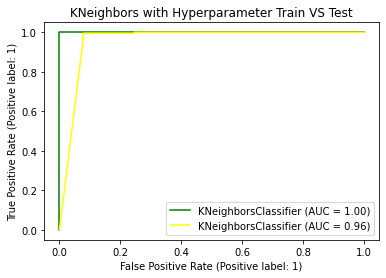

In [197]:
AucPlot8=plot_roc_curve(knn2,x_train,y_train,color='green')
plot_roc_curve(knn2,x_test,y_test,ax=AucPlot8.ax_,color='yellow')
plt.title("KNeighbors with Hyperparameter Train VS Test")
plt.show()

*  Hyperparameter tunning with GBClassifier

In [198]:
par3={'n_estimators':[50,100],
         'min_samples_split':[5,6,7,12],
            'max_depth':[7,8,11,12],
           'learning_rate':[1.0,0.1,0.01,0.05]}


grid3=GridSearchCV(GradientBoostingClassifier(),cv=5,param_grid=par3)
grid3.fit(x_train,y_train)
print(grid3.best_params_)

{'learning_rate': 1.0, 'max_depth': 12, 'min_samples_split': 6, 'n_estimators': 50}


In [199]:
gbdt2=grid3.best_estimator_
gbdt2.fit(x_train,y_train)

Cscore(gbdt2,x_train,y_train,x_test,y_test,train_score=True)
Cscore(gbdt2,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9454545454545454
******************************************************
Test Precision Score is  0.9556650246305419
******************************************************
Test f1 Score is  0.9417475728155339
******************************************************
Test Recall Score is  0.9282296650717703
******************************************************
Test roc_auc_Score is  0.9446343130553656
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.937     0.961     0.949       231
           1      0.956     0.928     0.942       209

    accuracy                          0.945       440
   macro avg      0.946     0.945     

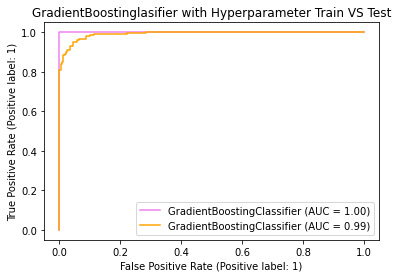

In [200]:
AucPlot9=plot_roc_curve(gbdt2,x_train,y_train,color='violet')
plot_roc_curve(gbdt2,x_test,y_test,ax=AucPlot9.ax_,color='orange')
plt.title("GradientBoostinglasifier with Hyperparameter Train VS Test")
plt.show()

* Hyperparameter tunning with RandomForestClassifier

In [201]:
param4={'criterion' : ['gini','entropy','log_loss'],
                     'max_depth' :[9,13,15,20],
                      'min_samples_split' :[3,5,7,9], 
                     'min_samples_leaf' :[1,3,5,9],
                     'bootstrap':['True'],
                      'oob_score':['True'],
                     'max_samples' : [0.7,0.8],
                     
                      }


grid4=GridSearchCV(RandomForestClassifier(),param_grid=param4,cv=5).fit(x_train,y_train) 
print(grid4.best_params_)


{'bootstrap': 'True', 'criterion': 'entropy', 'max_depth': 20, 'max_samples': 0.8, 'min_samples_leaf': 1, 'min_samples_split': 3, 'oob_score': 'True'}


In [202]:
rf2=grid4.best_estimator_
rf2.fit(x_train,y_train)

Cscore(rf2,x_train,y_train,x_test,y_test,train_score=True)
Cscore(rf2,x_train,y_train,x_test,y_test,train_score=False)


******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9477272727272728
******************************************************
Test Precision Score is  0.9744897959183674
******************************************************
Test f1 Score is  0.9432098765432099
******************************************************
Test Recall Score is  0.9138755980861244
******************************************************
Test roc_auc_Score is  0.9461152882205514
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.926     0.978     0.952       231
           1      0.974     0.914     0.943       209

    accuracy                          0.948       440
   macro avg      0.950     0.946     

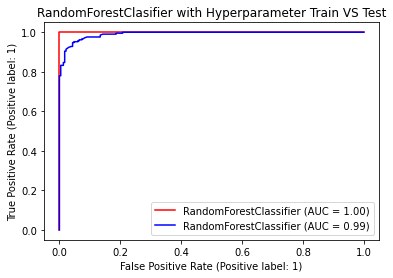

In [203]:
AucPlot10=plot_roc_curve(rf2,x_train,y_train,color='red')
plot_roc_curve(rf2,x_test,y_test,ax=AucPlot10.ax_,color='blue')
plt.title("RandomForestClasifier with Hyperparameter Train VS Test")
plt.show()

* GradientBoostingClasifier without hyperparametr will finalize

1] No overfitting observe in validation score

2] Test accuracy is 94.54% i.e. 95% approx.

3] Train Accuracy is 100%

4] roc auc score is 0.9453

5] Auc is grapgh is 0.99 for test and 1.0 for train data.

In [204]:
gbdt1=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,criterion='friedman_mse',min_samples_split=5,min_samples_leaf=1,max_depth=7)
gbdt1.fit(x_train,y_train)

Cscore(gbdt1,x_train,y_train,x_test,y_test,train_score=True)
Cscore(gbdt1,x_train,y_train,x_test,y_test,train_score=False)

******** Train Results***************
Train Accuracy Score is  1.0
******************************************************
Train roc_auc_Score is  1.0
--------------------------------------------------

******** Test Results***************
Test Accuracy Score is  0.9568181818181818
******************************************************
Test Precision Score is  0.9567307692307693
******************************************************
Test f1 Score is  0.9544364508393286
******************************************************
Test Recall Score is  0.9521531100478469
******************************************************
Test roc_auc_Score is  0.956596035543404
--------------------------------------------------

 Classification Report 
                precision    recall  f1-score   support

           0      0.957     0.961     0.959       231
           1      0.957     0.952     0.954       209

    accuracy                          0.957       440
   macro avg      0.957     0.957     0

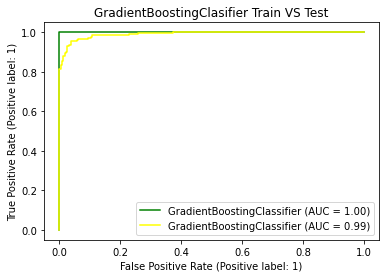

In [205]:
AucPlot4=plot_roc_curve(gbdt1,x_train,y_train,color='green')
plot_roc_curve(gbdt1,x_test,y_test,ax=AucPlot4.ax_,color='yellow')
plt.title("GradientBoostingClasifier Train VS Test")
plt.show()

* Saving model

In [207]:
import joblib
joblib.dump(gbdt1,"HraGBC.pkl")

['HraGBC.pkl']